In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # 데이터프레임 컬럼 display

import warnings
warnings.filterwarnings('ignore') # 경고 무시

In [2]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### Raw data 가져오기

In [4]:
df = pd.read_csv('../dataset/volleyball_raw.csv')
df.head()

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,19,메디 (L),O,O,O,O,O,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.2,17.89,24,20,4,0,4.0,20.17,7,0,1,0.0,3.72,28,11,2,1.8,28.28,20,3,5,6,1,0.6,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,7,고예림 (L),O,O,O,O,O,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.6,18.95,22,17,5,0,3.4,18.49,7,1,0,0.2,3.72,25,15,1,2.8,25.25,10,0,7,3,0,0.0,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,4,김희진 (R),O,O,O,O,O,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.2,13.68,12,11,1,0,2.2,10.08,7,0,1,0.0,3.72,0,0,0,0.0,0.00,14,4,6,3,0,0.8,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,17,김미연 (L),O,O,O,O,O,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.0,14.74,6,5,1,0,1.0,5.04,3,0,0,0.0,1.60,1,0,0,0.0,1.01,12,2,2,7,0,0.4,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,11,김수지 (C),O,O,O,O,O,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.2,14.74,11,10,1,0,2.0,9.24,7,0,0,0.0,3.72,0,0,0,0.0,0.00,28,1,13,9,0,0.2,29.79,2,0,3


### 데이터 전처리

In [5]:
# No. 열 삭제
df = df.drop('No.', axis = 1)

In [6]:
# 3경기 이상 출전한 선수만 유지 (출전 세트 결측치가 3개 이상인 선수 제거)
subset = ['출전세트_1set', '출전세트_2set', '출전세트_3set', '출전세트_4set', '출전세트_5set']

# thresh = 3 : 정상 값(Not NaN)이 3개 이상만 유지
df = df.dropna(subset = subset, thresh = 3)
df

,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),O,O,O,NaN,NaN,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),O,O,O,NaN,NaN,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),12,11,11,NaN,NaN,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),14,O,O,NaN,NaN,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0


In [7]:
# 스타팅멤버 표시 (3세트 이상 스타팅멤버라면 1 아니면 0)
df['스타팅멤버'] = 0

df.loc[(df.iloc[:, 5:10] == 'O').sum(axis = 1) >= 3, '스타팅멤버'] = 1
df

,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,1
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,1
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,1
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),O,O,O,NaN,NaN,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,1
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),O,O,O,NaN,NaN,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,1
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),12,11,11,NaN,NaN,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,0
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),14,O,O,NaN,NaN,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,0


In [8]:
# 출전 세트 열 삭제
subset = ['출전세트_1set', '출전세트_2set', '출전세트_3set', '출전세트_4set', '출전세트_5set']

df = df.drop(subset, axis = 1)
df

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버
0,1,IBK기업은행,2017-10-14,0,메디 (L),24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,1
1,1,IBK기업은행,2017-10-14,0,고예림 (L),15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,1
2,1,IBK기업은행,2017-10-14,0,김희진 (R),15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,1
3,1,IBK기업은행,2017-10-14,0,김미연 (L),7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,1
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,1
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,0
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,0


In [9]:
# 이름과 포지션 분리하기
# "이름" 열 : 이름 정보
# "포지션" 열 : 포지션 정보

df['포지션'] = df['이름'].str.split().str[1].str.strip('()')
df['이름'] = df['이름'].str.split().str[0]
df

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,오픈_시도,오픈_성공,오픈_공격차단,오픈_범실,오픈_성공률,오픈_점유율,시간차_시도,시간차_성공,시간차_공격차단,시간차_범실,시간차_성공률,시간차_점유율,이동_시도,이동_성공,이동_공격차단,이동_범실,이동_성공률,이동_점유율,후위_시도,후위_성공,후위_공격차단,후위_범실,후위_성공률,후위_점유율,속공_시도,속공_성공,속공_공격차단,속공_범실,속공_성공률,속공_점유율,퀵오픈_시도,퀵오픈_성공,퀵오픈_공격차단,퀵오픈_범실,퀵오픈_성공률,퀵오픈_점유율,서브_시도,서브_성공,서브_범실,서브_성공률,서브_점유율,디그_시도,디그_성공,디그_실패,디그_범실,디그_세트당,디그_점유율,세트_시도,세트_성공,세트_범실,세트_세트당,세트_점유율,리시브_시도,리시브_정확,리시브_실패,리시브_세트당,리시브_점유율,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버,포지션
0,1,IBK기업은행,2017-10-14,0,메디,24,67,20,4,2,29.85,37.43,41,11,3,1,26.83,46.59,3,3,0,0,100.00,17.65,0,0,0,0,0.00,0.00,12,1,1,0,8.33,57.14,0,0,0,0,0.00,0.00,11,5,0,1,45.45,28.21,17,1,3,0.20,17.89,24,20,4,0,4.00,20.17,7,0,1,0.00,3.72,28,11,2,1.80,28.28,20,3,5,6,1,0.60,21.28,1,0,7,1,L
1,1,IBK기업은행,2017-10-14,0,고예림,15,40,12,6,4,30.00,22.35,25,3,5,4,12.00,28.41,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,15,9,1,0,60.00,38.46,18,3,2,0.60,18.95,22,17,5,0,3.40,18.49,7,1,0,0.20,3.72,25,15,1,2.80,25.25,10,0,7,3,0,0.00,10.64,0,0,6,1,L
2,1,IBK기업은행,2017-10-14,0,김희진,15,36,10,2,2,27.78,20.11,10,2,0,1,20.00,11.36,9,4,1,1,44.44,52.94,0,0,0,0,0.00,0.00,9,0,1,0,0.00,42.86,0,0,0,0,0.00,0.00,8,4,0,0,50.00,20.51,13,1,3,0.20,13.68,12,11,1,0,2.20,10.08,7,0,1,0.00,3.72,0,0,0,0.00,0.00,14,4,6,3,0,0.80,14.89,1,0,6,1,R
3,1,IBK기업은행,2017-10-14,0,김미연,7,16,5,1,0,31.25,8.94,6,1,0,0,16.67,6.82,1,0,1,0,0.00,5.88,3,1,0,0,33.33,42.86,0,0,0,0,0.00,0.00,1,0,0,0,0.00,14.29,5,3,0,0,60.00,12.82,14,0,1,0.00,14.74,6,5,1,0,1.00,5.04,3,0,0,0.00,1.60,1,0,0,0.00,1.01,12,2,2,7,0,0.40,12.77,3,0,1,1,L
4,1,IBK기업은행,2017-10-14,0,김수지,6,16,4,1,2,25.00,8.94,2,0,0,0,0.00,2.27,4,2,0,1,50.00,23.53,4,1,1,0,25.00,57.14,0,0,0,0,0.00,0.00,6,1,0,1,16.67,85.71,0,0,0,0,0.00,0.00,14,1,1,0.20,14.74,11,10,1,0,2.00,9.24,7,0,0,0.00,3.72,0,0,0,0.00,0.00,28,1,13,9,0,0.20,29.79,2,0,3,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이,4,7,2,2,0,28.57,7.00,2,0,1,0,0.00,4.76,0,0,0,0,0.00,0.00,2,0,1,0,0.00,100.00,0,0,0,0,0.00,0.00,3,2,0,0,66.67,50.00,0,0,0,0,0.00,0.00,8,0,0,0.00,15.09,7,6,1,0,2.00,11.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,14,2,5,5,0,0.67,31.11,2,0,0,1,C
10989,474,KGC인삼공사,2022-02-28,0,정호영,3,5,3,1,0,60.00,5.00,3,2,1,0,66.67,7.14,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,2,1,0,0,50.00,33.33,0,0,0,0,0.00,0.00,4,0,0,0.00,7.55,1,1,0,0,0.33,1.67,0,0,0,0.00,0.00,0,0,0,0.00,0.00,2,0,0,2,0,0.00,4.44,3,0,0,1,C
10990,474,KGC인삼공사,2022-02-28,0,고의정,1,3,0,0,0,0.00,3.00,2,0,0,0,0.00,4.76,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,1,0,0,0,0.00,3.23,4,1,1,0.33,7.55,3,2,1,0,0.67,5.00,0,0,0,0.00,0.00,3,0,0,0.00,4.23,0,0,0,0,0,0.00,0.00,0,0,1,0,L
10991,474,KGC인삼공사,2022-02-28,0,하효림,1,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0,0.00,0.00,9,1,0,0.33,16.98,3,2,1,0,0.67,5.00,54,22,0,7.33,51.92,1,0,0,0.00,1.41,4,0,2,1,0,0.00,8.89,2,0,0,0,S


In [10]:
# 선수 별 득점 점유율 구하기 (개인 별 득점을 팀 전체의 득점으로 나누기)

tem = df.groupby(['경기번호'])['득점_득점'].sum()
tem = tem.reset_index()
df2 = pd.merge(df,tem,how='inner',on='경기번호')
df2.rename(columns={'득점_득점_x' : '득점_득점','득점_득점_y':'경기득점'},inplace=True)
df2['득점점유율'] = df2['득점_득점'] / df2['경기득점']
df['득점점유율'] = df2['득점점유율']

In [11]:
# # 컬럼 선택

# columns = [
#     '팀명', '경기날짜', '결과', '이름',
# #     '득점_득점',
# #     '공격종합_시도',
# #     '공격종합_성공',
# #     '공격종합_공격차단',
# #     '공격종합_범실',
#     '공격종합_성공률',
# #     '공격종합_점유율',
# #     '오픈_시도',
# #     '오픈_성공',
# #     '오픈_공격차단',
# #     '오픈_범실',
#     '오픈_성공률',
# #     '오픈_점유율',
# #     '시간차_시도',
# #     '시간차_성공',
# #     '시간차_공격차단',
# #     '시간차_범실',
#     '시간차_성공률',
# #     '시간차_점유율',
# #     '이동_시도',
# #     '이동_성공',
# #     '이동_공격차단',
# #     '이동_범실',
#     '이동_성공률',
# #     '이동_점유율',
# #     '후위_시도',
# #     '후위_성공',
# #     '후위_공격차단',
# #     '후위_범실',
#     '후위_성공률',
# #     '후위_점유율',
# #     '속공_시도',
# #     '속공_성공',
# #     '속공_공격차단',
# #     '속공_범실',
#     '속공_성공률',
# #     '속공_점유율',
# #     '퀵오픈_시도',
# #     '퀵오픈_성공',
# #     '퀵오픈_공격차단',
# #     '퀵오픈_범실',
#     '퀵오픈_성공률',
# #     '퀵오픈_점유율',
# #     '서브_시도',
# #     '서브_성공',
# #     '서브_범실',
#     '서브_성공률',
# #     '서브_점유율',
# #     '디그_시도',
# #     '디그_성공',
# #     '디그_실패',
# #     '디그_범실',
# #     '디그_세트당',
# #     '디그_점유율',
# #     '세트_시도',
# #     '세트_성공',
# #     '세트_범실',
# #     '세트_세트당',
# #     '세트_점유율',
# #     '리시브_시도',
# #     '리시브_정확',
# #     '리시브_실패',
# #     '리시브_세트당',
# #     '리시브_점유율',
# #     '블로킹_시도',
# #     '블로킹_성공',
# #     '블로킹_유효블락',
# #     '블로킹_실패',
# #     '블로킹_범실',
# #     '블로킹_세트당',
# #     '블로킹_점유율',
# #     '블로킹_어시스트',
# #     '벌칙_벌칙',
#     '범실_범실',
#     '포지션',
#     '득점점유율',
#     '스타팅멤버'
# ]

# df = df[columns]
# df

In [12]:
# 컬럼 선택

new_columns = [
    '팀명', '경기날짜', '결과', '이름',
#     '득점_득점',
#     '공격종합_시도',
#     '공격종합_성공',
#     '공격종합_공격차단',
#     '공격종합_범실',
    '공격종합_성공률',
#     '공격종합_점유율',
#     '오픈_시도',
#     '오픈_성공',
#     '오픈_공격차단',
#     '오픈_범실',
    '오픈_성공률',
#     '오픈_점유율',
#     '시간차_시도',
#     '시간차_성공',
#     '시간차_공격차단',
#     '시간차_범실',
    '시간차_성공률',
#     '시간차_점유율',
#     '이동_시도',
#     '이동_성공',
#     '이동_공격차단',
#     '이동_범실',
    '이동_성공률',
#     '이동_점유율',
#     '후위_시도',
#     '후위_성공',
#     '후위_공격차단',
#     '후위_범실',
    '후위_성공률',
#     '후위_점유율',
#     '속공_시도',
#     '속공_성공',
#     '속공_공격차단',
#     '속공_범실',
    '속공_성공률',
#     '속공_점유율',
#     '퀵오픈_시도',
#     '퀵오픈_성공',
#     '퀵오픈_공격차단',
#     '퀵오픈_범실',
    '퀵오픈_성공률',
#     '퀵오픈_점유율',
#     '서브_시도',
#     '서브_성공',
#     '서브_범실',
    '서브_성공률',
#     '서브_점유율',
#     '디그_시도',
    '디그_성공',
#     '디그_실패',
#     '디그_범실',
#     '디그_세트당',
#     '디그_점유율',
#     '세트_시도',
    '세트_성공',
#     '세트_범실',
#     '세트_세트당',
#     '세트_점유율',
#     '리시브_시도',
    '리시브_정확',
#     '리시브_실패',
#     '리시브_세트당',
#     '리시브_점유율',
#     '블로킹_시도',
    '블로킹_성공',
#     '블로킹_유효블락',
#     '블로킹_실패',
#     '블로킹_범실',
#     '블로킹_세트당',
#     '블로킹_점유율',
#     '블로킹_어시스트',
#     '벌칙_벌칙',
    '범실_범실',
    '포지션',
    '득점점유율',
    '스타팅멤버'
]

df = df[new_columns]
df

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_성공,세트_성공,리시브_정확,블로킹_성공,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,2017-10-14,0,메디,29.85,26.83,100.00,0.00,8.33,0.00,45.45,0.20,20,0,11,3,7,L,0.158940,1
1,IBK기업은행,2017-10-14,0,고예림,30.00,12.00,0.00,0.00,0.00,0.00,60.00,0.60,17,1,15,0,6,L,0.099338,1
2,IBK기업은행,2017-10-14,0,김희진,27.78,20.00,44.44,0.00,0.00,0.00,50.00,0.20,11,0,0,4,6,R,0.099338,1
3,IBK기업은행,2017-10-14,0,김미연,31.25,16.67,0.00,33.33,0.00,0.00,60.00,0.00,5,0,0,2,1,L,0.046358,1
4,IBK기업은행,2017-10-14,0,김수지,25.00,0.00,50.00,25.00,0.00,16.67,0.00,0.20,10,0,0,1,3,C,0.039735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,KGC인삼공사,2022-02-28,0,한송이,28.57,0.00,0.00,0.00,0.00,66.67,0.00,0.00,6,0,0,2,0,C,NaN,1
10989,KGC인삼공사,2022-02-28,0,정호영,60.00,66.67,0.00,0.00,0.00,50.00,0.00,0.00,1,0,0,0,0,C,NaN,1
10990,KGC인삼공사,2022-02-28,0,고의정,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,2,0,0,0,1,L,NaN,0
10991,KGC인삼공사,2022-02-28,0,하효림,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,2,22,0,0,0,S,NaN,0


In [13]:
# 컬럼 선택

new_new_columns = [
    '팀명', '경기날짜', '결과', '이름',
#     '득점_득점',
#     '공격종합_시도',
#     '공격종합_성공',
#     '공격종합_공격차단',
#     '공격종합_범실',
    '공격종합_성공률',
#     '공격종합_점유율',
#     '오픈_시도',
#     '오픈_성공',
#     '오픈_공격차단',
#     '오픈_범실',
    '오픈_성공률',
#     '오픈_점유율',
#     '시간차_시도',
#     '시간차_성공',
#     '시간차_공격차단',
#     '시간차_범실',
#     '시간차_성공률',
#     '시간차_점유율',
#     '이동_시도',
#     '이동_성공',
#     '이동_공격차단',
#     '이동_범실',
#     '이동_성공률',
#     '이동_점유율',
#     '후위_시도',
#     '후위_성공',
#     '후위_공격차단',
#     '후위_범실',
    '후위_성공률',
#     '후위_점유율',
#     '속공_시도',
#     '속공_성공',
#     '속공_공격차단',
#     '속공_범실',
    '속공_성공률',
#     '속공_점유율',
#     '퀵오픈_시도',
#     '퀵오픈_성공',
#     '퀵오픈_공격차단',
#     '퀵오픈_범실',
    '퀵오픈_성공률',
#     '퀵오픈_점유율',
#     '서브_시도',
#     '서브_성공',
#     '서브_범실',
    '서브_성공률',
#     '서브_점유율',
#     '디그_시도',
#     '디그_성공',
#     '디그_실패',
#     '디그_범실',
#     '디그_세트당',
#     '디그_점유율',
#     '세트_시도',
    '세트_성공',
#     '세트_범실',
#     '세트_세트당',
#     '세트_점유율',
#     '리시브_시도',
    '리시브_정확',
#     '리시브_실패',
#     '리시브_세트당',
#     '리시브_점유율',
#     '블로킹_시도',
    '블로킹_성공',
#     '블로킹_유효블락',
#     '블로킹_실패',
#     '블로킹_범실',
#     '블로킹_세트당',
#     '블로킹_점유율',
#     '블로킹_어시스트',
#     '벌칙_벌칙',
    '범실_범실',
    '포지션',
    '득점점유율',
    '스타팅멤버'
]

df = df[new_columns]
df

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_성공,세트_성공,리시브_정확,블로킹_성공,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,2017-10-14,0,메디,29.85,26.83,100.00,0.00,8.33,0.00,45.45,0.20,20,0,11,3,7,L,0.158940,1
1,IBK기업은행,2017-10-14,0,고예림,30.00,12.00,0.00,0.00,0.00,0.00,60.00,0.60,17,1,15,0,6,L,0.099338,1
2,IBK기업은행,2017-10-14,0,김희진,27.78,20.00,44.44,0.00,0.00,0.00,50.00,0.20,11,0,0,4,6,R,0.099338,1
3,IBK기업은행,2017-10-14,0,김미연,31.25,16.67,0.00,33.33,0.00,0.00,60.00,0.00,5,0,0,2,1,L,0.046358,1
4,IBK기업은행,2017-10-14,0,김수지,25.00,0.00,50.00,25.00,0.00,16.67,0.00,0.20,10,0,0,1,3,C,0.039735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,KGC인삼공사,2022-02-28,0,한송이,28.57,0.00,0.00,0.00,0.00,66.67,0.00,0.00,6,0,0,2,0,C,NaN,1
10989,KGC인삼공사,2022-02-28,0,정호영,60.00,66.67,0.00,0.00,0.00,50.00,0.00,0.00,1,0,0,0,0,C,NaN,1
10990,KGC인삼공사,2022-02-28,0,고의정,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,2,0,0,0,1,L,NaN,0
10991,KGC인삼공사,2022-02-28,0,하효림,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,2,22,0,0,0,S,NaN,0


In [125]:
8116-7849

267

In [14]:
new_new_columns

['팀명',
 '경기날짜',
 '결과',
 '이름',
 '공격종합_성공률',
 '오픈_성공률',
 '후위_성공률',
 '속공_성공률',
 '퀵오픈_성공률',
 '서브_성공률',
 '세트_성공',
 '리시브_정확',
 '블로킹_성공',
 '범실_범실',
 '포지션',
 '득점점유율',
 '스타팅멤버']

Index(['팀명', '경기날짜', '결과', '이름', '공격종합_성공률', '오픈_성공률', '시간차_성공률', '이동_성공률',
       '후위_성공률', '속공_성공률', '퀵오픈_성공률', '서브_성공률', '범실_범실', '포지션', '득점점유율',
       '스타팅멤버'],
      dtype='object')

## 데이터 변경

In [15]:
# 한 경기당 스타팅멤버의 수 확인
df.groupby(['경기날짜', '팀명'])[['스타팅멤버']].sum().value_counts()

스타팅멤버
6        673
5        178
4         61
3         21
7         10
2          5
dtype: int64

In [16]:
# 경기날짜의 데이터타입 변경 (datetime64)
df['경기날짜'] = df['경기날짜'].astype('datetime64')
df.dtypes

팀명                  object
경기날짜        datetime64[ns]
결과                   int64
이름                  object
공격종합_성공률           float64
오픈_성공률             float64
시간차_성공률            float64
이동_성공률             float64
후위_성공률             float64
속공_성공률             float64
퀵오픈_성공률            float64
서브_성공률             float64
디그_성공                int64
세트_성공                int64
리시브_정확               int64
블로킹_성공               int64
범실_범실                int64
포지션                 object
득점점유율              float64
스타팅멤버                int64
dtype: object

In [17]:
# 스타팅멤버만 선택
df_starting = df[df['스타팅멤버'] == 1]
df_starting

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_성공,세트_성공,리시브_정확,블로킹_성공,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,2017-10-14,0,메디,29.85,26.83,100.00,0.00,8.33,0.00,45.45,0.2,20,0,11,3,7,L,0.158940,1
1,IBK기업은행,2017-10-14,0,고예림,30.00,12.00,0.00,0.00,0.00,0.00,60.00,0.6,17,1,15,0,6,L,0.099338,1
2,IBK기업은행,2017-10-14,0,김희진,27.78,20.00,44.44,0.00,0.00,0.00,50.00,0.2,11,0,0,4,6,R,0.099338,1
3,IBK기업은행,2017-10-14,0,김미연,31.25,16.67,0.00,33.33,0.00,0.00,60.00,0.0,5,0,0,2,1,L,0.046358,1
4,IBK기업은행,2017-10-14,0,김수지,25.00,0.00,50.00,25.00,0.00,16.67,0.00,0.2,10,0,0,1,3,C,0.039735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10985,KGC인삼공사,2022-02-28,0,옐레나,43.90,35.29,0.00,0.00,50.00,0.00,50.00,0.0,9,0,0,3,2,R,NaN,1
10986,KGC인삼공사,2022-02-28,0,이소영,28.57,0.00,0.00,0.00,0.00,0.00,50.00,0.0,10,1,10,3,2,L,NaN,1
10987,KGC인삼공사,2022-02-28,0,박혜민,30.00,25.00,0.00,0.00,0.00,0.00,33.33,0.0,7,0,3,0,4,L,NaN,1
10988,KGC인삼공사,2022-02-28,0,한송이,28.57,0.00,0.00,0.00,0.00,66.67,0.00,0.0,6,0,0,2,0,C,NaN,1


In [18]:
## 경기 당 스타팅멤버가 5명 이상만 선택

# 스타팅멤버가 5명 미만이 포함된 날짜 선택
temp = (df_starting.groupby(['경기날짜', '팀명'])[['스타팅멤버']].sum() < 5).reset_index()
drop_dates = temp.loc[temp['스타팅멤버'], '경기날짜'].unique()

# drop_dates를 제외한 날짜만 선택
df_starting = df_starting[~df_starting['경기날짜'].isin(drop_dates)]

# 스타팅멤버 다시 확인
df_starting.groupby(['경기날짜', '팀명'])['스타팅멤버'].sum().value_counts()

6    613
5    151
7     10
Name: 스타팅멤버, dtype: int64

In [19]:
df_starting.head()

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_성공,세트_성공,리시브_정확,블로킹_성공,범실_범실,포지션,득점점유율,스타팅멤버
0,IBK기업은행,2017-10-14,0,메디,29.85,26.83,100.00,0.00,8.33,0.00,45.45,0.2,20,0,11,3,7,L,0.158940,1
1,IBK기업은행,2017-10-14,0,고예림,30.00,12.00,0.00,0.00,0.00,0.00,60.00,0.6,17,1,15,0,6,L,0.099338,1
2,IBK기업은행,2017-10-14,0,김희진,27.78,20.00,44.44,0.00,0.00,0.00,50.00,0.2,11,0,0,4,6,R,0.099338,1
3,IBK기업은행,2017-10-14,0,김미연,31.25,16.67,0.00,33.33,0.00,0.00,60.00,0.0,5,0,0,2,1,L,0.046358,1
4,IBK기업은행,2017-10-14,0,김수지,25.00,0.00,50.00,25.00,0.00,16.67,0.00,0.2,10,0,0,1,3,C,0.039735,1


In [20]:
# 데이터프레임 변경 (날짜, 팀 별 출전 선수 명단과 결과)
df_starting5 = df_starting.groupby(['경기날짜', '팀명'])[['이름', '결과']].agg({'이름' : lambda data : ' '.join(data).split(), '결과' : any})
df_starting5 = pd.DataFrame(df_starting5).reset_index()
df_starting5['이름'] = df_starting5['이름'].str[:5]
df_starting5.head()

,경기날짜,팀명,이름,결과
0,2017-10-14,IBK기업은행,"[메디, 고예림, 김희진, 김미연, 김수지]",False
1,2017-10-14,흥국생명,"[심슨, 이재영, 정시영, 김나희, 조송화]",True
2,2017-10-15,KGC인삼공사,"[알레나, 한송이, 유희옥, 최수빈, 이재은]",False
3,2017-10-15,현대건설,"[엘리자베스, 황연주, 양효진, 김세영, 황민경]",True
4,2017-10-17,GS칼텍스,"[강소휘, 듀크, 표승주, 문명화, 김유리]",True


In [21]:
# 경기번호 추가
total = df_starting5.shape[0] // 2
df_starting5['경기번호'] = np.array([[i,i] for i in range(1, total+1)]).flatten()
df_starting5.head()

,경기날짜,팀명,이름,결과,경기번호
0,2017-10-14,IBK기업은행,"[메디, 고예림, 김희진, 김미연, 김수지]",False,1
1,2017-10-14,흥국생명,"[심슨, 이재영, 정시영, 김나희, 조송화]",True,1
2,2017-10-15,KGC인삼공사,"[알레나, 한송이, 유희옥, 최수빈, 이재은]",False,2
3,2017-10-15,현대건설,"[엘리자베스, 황연주, 양효진, 김세영, 황민경]",True,2
4,2017-10-17,GS칼텍스,"[강소휘, 듀크, 표승주, 문명화, 김유리]",True,3


In [22]:
# 데이터프레임 변경 (경기 별 두 팀의 이름, 출전 선수 명단과 결과)
def concat_names(data) :
    result = []
    for d in data :
        result += d
    return result
df_game = df_starting5.groupby('경기번호').agg({'경기날짜' : lambda dates : dates.values[0],
                                                '팀명' : lambda teams : ' vs '.join(teams),
                                                '이름' : concat_names,
                                                '결과' : np.argmax}).reset_index()
df_game

,경기번호,경기날짜,팀명,이름,결과
0,1,2017-10-14,IBK기업은행 vs 흥국생명,"[메디, 고예림, 김희진, 김미연, 김수지, 심슨, 이재영, 정시영, 김나희, 조송화]",1
1,2,2017-10-15,KGC인삼공사 vs 현대건설,"[알레나, 한송이, 유희옥, 최수빈, 이재은, 엘리자베스, 황연주, 양효진, 김세영...",1
2,3,2017-10-17,GS칼텍스 vs 한국도로공사,"[강소휘, 듀크, 표승주, 문명화, 김유리, 이바나, 박정아, 정대영, 배유나, 최은지]",0
3,4,2017-10-18,IBK기업은행 vs 현대건설,"[메디, 김희진, 고예림, 김수지, 이고은, 엘리자베스, 양효진, 황연주, 김세영,...",1
4,5,2017-10-21,KGC인삼공사 vs 흥국생명,"[알레나, 한송이, 유희옥, 한수지, 최수빈, 심슨, 이재영, 정시영, 김나희, 조송화]",1
...,...,...,...,...,...
382,383,2022-02-21,KGC인삼공사 vs 한국도로공사,"[옐레나, 박혜민, 고의정, 박은진, 한송이, 켈시, 박정아, 배유나, 정대영, 문정원]",1
383,384,2022-02-22,IBK기업은행 vs 현대건설,"[김희진, 김주향, 산타나, 김수지, 최정민, 야스민, 양효진, 고예림, 황민경, ...",1
384,385,2022-02-25,KGC인삼공사 vs 현대건설,"[옐레나, 박혜민, 정호영, 이소영, 한송이, 야스민, 양효진, 정지윤, 이다현, ...",0
385,386,2022-02-26,IBK기업은행 vs 흥국생명,"[표승주, 김희진, 산타나, 김수지, 최정민, 캣벨, 김미연, 이주아, 김채연, 박혜진]",0


In [23]:
# 선수의 직전 기록 찾는 함수 정의
def find_previous_record(df, date, name) :
    day1 = pd.Timedelta(days=1)
    date -= day1
    
    while date >= df.loc[0, '경기날짜'] :
        row = df[(df['경기날짜'] == date) & (df['이름'] == name)]
        if len(row) : # 이전 기록 존재
            return row.iloc[0, :]
        date -= day1
    else : # 이전 기록 존재 x
        return []

In [24]:
new_columns

['팀명',
 '경기날짜',
 '결과',
 '이름',
 '공격종합_성공률',
 '오픈_성공률',
 '시간차_성공률',
 '이동_성공률',
 '후위_성공률',
 '속공_성공률',
 '퀵오픈_성공률',
 '서브_성공률',
 '디그_성공',
 '세트_성공',
 '리시브_정확',
 '블로킹_성공',
 '범실_범실',
 '포지션',
 '득점점유율',
 '스타팅멤버']

In [25]:
# 각 선수 별 직전 기록을 새로운 열에 추가
# cols = ['공격종합_성공률','오픈_성공률','시간차_성공률','이동_성공률','후위_성공률','속공_성공률','퀵오픈_성공률','서브_성공률','범실_범실']
# cols = [ '공격종합_성공률',
#  '오픈_성공률',
#  '시간차_성공률',
#  '이동_성공률',
#  '후위_성공률',
#  '속공_성공률',
#  '퀵오픈_성공률',
#  '서브_성공률',
#  '디그_성공',
#  '세트_성공',
#  '리시브_정확',
#  '블로킹_성공',
#  '범실_범실',
#  '득점점유율',
#  '스타팅멤버']

cols = ['공격종합_성공률',
 '오픈_성공률',
 '후위_성공률',
 '속공_성공률',
 '퀵오픈_성공률',
 '서브_성공률',
 '세트_성공',
 '리시브_정확',
 '블로킹_성공',
 '범실_범실',
 '득점점유율',
 '스타팅멤버']

rows = []
for i in range(len(df_game)) :
    date = df_game.loc[i, '경기날짜']
    names = df_game.loc[i, '이름']
    row = []
    
    for name in names :
        result = find_previous_record(df, date, name)
        if len(result) == 0 :
            row += [np.nan] * len(cols)
        else :
            row += list(result[cols].values.flatten())
    rows.append(row)

    
columns = []
for team in ['A팀', 'B팀'] :
    for player in ['선수1', '선수2', '선수3', '선수4', '선수5'] :
        columns += [f'{team}_{player}_{col}' for col in cols]
        
df_game = pd.concat([df_game, pd.DataFrame(rows, columns = columns)], axis = 1)
df_game.tail()

,경기번호,경기날짜,팀명,이름,결과,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_세트_성공,A팀_선수1_리시브_정확,A팀_선수1_블로킹_성공,A팀_선수1_범실_범실,A팀_선수1_득점점유율,A팀_선수1_스타팅멤버,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_세트_성공,A팀_선수2_리시브_정확,A팀_선수2_블로킹_성공,A팀_선수2_범실_범실,A팀_선수2_득점점유율,A팀_선수2_스타팅멤버,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_세트_성공,A팀_선수3_리시브_정확,A팀_선수3_블로킹_성공,A팀_선수3_범실_범실,A팀_선수3_득점점유율,A팀_선수3_스타팅멤버,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_세트_성공,A팀_선수4_리시브_정확,A팀_선수4_블로킹_성공,A팀_선수4_범실_범실,A팀_선수4_득점점유율,A팀_선수4_스타팅멤버,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_세트_성공,A팀_선수5_리시브_정확,A팀_선수5_블로킹_성공,A팀_선수5_범실_범실,A팀_선수5_득점점유율,A팀_선수5_스타팅멤버,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_세트_성공,B팀_선수1_리시브_정확,B팀_선수1_블로킹_성공,B팀_선수1_범실_범실,B팀_선수1_득점점유율,B팀_선수1_스타팅멤버,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_세트_성공,B팀_선수2_리시브_정확,B팀_선수2_블로킹_성공,B팀_선수2_범실_범실,B팀_선수2_득점점유율,B팀_선수2_스타팅멤버,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_세트_성공,B팀_선수3_리시브_정확,B팀_선수3_블로킹_성공,B팀_선수3_범실_범실,B팀_선수3_득점점유율,B팀_선수3_스타팅멤버,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_세트_성공,B팀_선수4_리시브_정확,B팀_선수4_블로킹_성공,B팀_선수4_범실_범실,B팀_선수4_득점점유율,B팀_선수4_스타팅멤버,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_세트_성공,B팀_선수5_리시브_정확,B팀_선수5_블로킹_성공,B팀_선수5_범실_범실,B팀_선수5_득점점유율,B팀_선수5_스타팅멤버
382,383,2022-02-21,KGC인삼공사 vs 한국도로공사,"[옐레나, 박혜민, 고의정, 박은진, 한송이, 켈시, 박정아, 배유나, 정대영, 문정원]",1,42.11,33.33,38.46,0.0,66.67,0.33,0.0,0.0,1.0,1.0,NaN,1.0,42.86,57.14,0.00,0.0,33.33,0.00,1.0,13.0,0.0,3.0,NaN,1.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2.0,NaN,0.0,62.50,50.00,0.0,60.00,0.00,0.00,0.0,0.0,4.0,2.0,NaN,1.0,37.50,0.0,0.0,42.86,0.0,0.33,0.0,0.0,2.0,1.0,NaN,1.0,36.54,30.43,30.77,0.0,33.33,0.00,0.0,0.0,2.0,1.0,NaN,1.0,35.42,42.31,50.0,0.00,22.22,0.25,2.0,1.0,2.0,7.0,NaN,1.0,57.14,57.14,0.0,75.0,0.00,0.5,0.0,0.0,0.0,4.0,NaN,1.0,25.00,28.57,0.0,20.00,0.00,0.25,0.0,0.0,5.0,2.0,NaN,1.0,30.77,0.00,0.0,0.00,75.00,0.25,2.0,12.0,0.0,2.0,NaN,1.0
383,384,2022-02-22,IBK기업은행 vs 현대건설,"[김희진, 김주향, 산타나, 김수지, 최정민, 야스민, 양효진, 고예림, 황민경, ...",1,48.28,50.00,60.00,0.0,25.00,0.00,0.0,0.0,2.0,3.0,NaN,1.0,38.24,11.11,0.00,0.0,66.67,0.20,1.0,6.0,2.0,2.0,NaN,1.0,35.29,10.00,0.0,0.00,43.48,0.0,1.0,7.0,3.0,5.0,NaN,1.0,40.00,0.00,0.0,54.55,0.00,0.00,1.0,0.0,2.0,2.0,NaN,1.0,66.67,0.0,0.0,80.00,0.0,0.33,2.0,0.0,2.0,2.0,NaN,1.0,43.75,33.33,63.16,0.0,41.67,0.40,0.0,0.0,1.0,11.0,NaN,1.0,40.00,40.00,0.0,37.50,0.00,0.00,2.0,1.0,3.0,3.0,NaN,1.0,44.44,50.00,0.0,0.0,44.44,0.0,0.0,6.0,0.0,5.0,NaN,1.0,30.77,22.22,0.0,0.00,66.67,0.00,0.0,1.0,2.0,4.0,NaN,1.0,50.00,100.00,0.0,50.00,0.00,0.00,0.0,0.0,5.0,2.0,NaN,1.0
384,385,2022-02-25,KGC인삼공사 vs 현대건설,"[옐레나, 박혜민, 정호영, 이소영, 한송이, 야스민, 양효진, 정지윤, 이다현, ...",0,35.38,37.84,26.09,0.0,60.00,0.25,0.0,0.0,3.0,6.0,NaN,1.0,31.25,30.43,0.00,0.0,29.17,0.25,0.0,9.0,1.0,6.0,NaN,1.0,75.00,100.00,0.0,66.67,0.00,1.0,0.0,0.0,3.0,1.0,NaN,1.0,40.54,27.78,0.0,0.00,36.36,0.00,2.0,14.0,1.0,2.0,NaN,1.0,50.00,100.0,0.0,40.00,0.0,0.00,1.0,0.0,4.0,2.0,NaN,1.0,33.33,18.75,33.33,0.0,80.00,0.00,0.0,0.0,0.0,1.0,NaN,1.0,23.53,27.27,0.0,16.67,0.00,0.00,0.0,1.0,2.0,3.0,NaN,1.0,28.00,20.00,0.0,0.0,66.67,0.0,0.0,8.0,2.0,3.0,NaN,0.0,28.57,0.00,0.0,33.33,0.00,0.00,1.0,0.0,2.0,2.0,NaN,1.0,55.56,60.00,0.0,0.00,33.33,0.25,0.0,10.0,0.0,2.0,NaN,1.0
385,386,2022-02-26,IBK기업은행 vs 흥국생명,"[표승주, 김희진, 산타나, 김수지, 최정민, 캣벨, 김미연, 이주아, 김채연, 박혜진]",0,26.67,0.00,0.00,0.0,50.00,0.00,1.0,5.0,0.0,0.0,NaN,0.0,32.43,33.33,28.57,0.0,33.33,0.25,0.0,0.0,0.0,3.0,NaN,1.0,39.13,12.50,0.0,0.00,57.14,0.0,0.0,3.0,0.0,1.0,NaN,1.0,33.33,20.00,0.0,40.00,0.00,0.25,1.0,0.0,1.0,1.0,NaN,1.0,42.86,50.0,0.0,40.00,0.0,0.00,0.0,0.0,1.0,4.0,NaN,1.0,34.

In [26]:
# '경기번호', '경기날짜', '팀명', '이름' 열 삭제
data = df_game.drop(['경기번호', '경기날짜', '팀명', '이름'], axis = 1)
data

,결과,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_세트_성공,A팀_선수1_리시브_정확,A팀_선수1_블로킹_성공,A팀_선수1_범실_범실,A팀_선수1_득점점유율,A팀_선수1_스타팅멤버,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_세트_성공,A팀_선수2_리시브_정확,A팀_선수2_블로킹_성공,A팀_선수2_범실_범실,A팀_선수2_득점점유율,A팀_선수2_스타팅멤버,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_세트_성공,A팀_선수3_리시브_정확,A팀_선수3_블로킹_성공,A팀_선수3_범실_범실,A팀_선수3_득점점유율,A팀_선수3_스타팅멤버,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_세트_성공,A팀_선수4_리시브_정확,A팀_선수4_블로킹_성공,A팀_선수4_범실_범실,A팀_선수4_득점점유율,A팀_선수4_스타팅멤버,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_세트_성공,A팀_선수5_리시브_정확,A팀_선수5_블로킹_성공,A팀_선수5_범실_범실,A팀_선수5_득점점유율,A팀_선수5_스타팅멤버,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_세트_성공,B팀_선수1_리시브_정확,B팀_선수1_블로킹_성공,B팀_선수1_범실_범실,B팀_선수1_득점점유율,B팀_선수1_스타팅멤버,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_세트_성공,B팀_선수2_리시브_정확,B팀_선수2_블로킹_성공,B팀_선수2_범실_범실,B팀_선수2_득점점유율,B팀_선수2_스타팅멤버,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_세트_성공,B팀_선수3_리시브_정확,B팀_선수3_블로킹_성공,B팀_선수3_범실_범실,B팀_선수3_득점점유율,B팀_선수3_스타팅멤버,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_세트_성공,B팀_선수4_리시브_정확,B팀_선수4_블로킹_성공,B팀_선수4_범실_범실,B팀_선수4_득점점유율,B팀_선수4_스타팅멤버,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_세트_성공,B팀_선수5_리시브_정확,B팀_선수5_블로킹_성공,B팀_선수5_범실_범실,B팀_선수5_득점점유율,B팀_선수5_스타팅멤버
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,29.85,26.83,8.33,0.0,45.45,0.20,0.0,11.0,3.0,7.0,0.158940,1.0,27.78,20.00,0.00,0.0,50.00,0.20,0.0,0.0,4.0,6.0,0.099338,1.0,30.00,12.00,0.0,0.00,60.00,0.6,1.0,15.0,0.0,6.0,0.099338,1.0,25.00,0.00,0.0,16.67,0.00,0.20,0.0,0.0,1.0,3.0,0.039735,1.0,0.00,0.00,0.0,0.00,0.0,0.20,27.0,0.0,0.0,2.0,0.006623,0.0,41.46,36.00,50.00,0.0,40.00,0.20,0.0,17.0,3.0,8.0,0.016667,1.0,43.48,33.33,0.0,85.71,0.00,0.40,0.0,0.0,4.0,5.0,0.00000,1.0,44.19,35.29,50.0,0.00,53.85,0.2,0.0,0.0,1.0,5.0,0.005556,1.0,30.77,0.00,0.0,33.33,0.00,0.00,1.0,0.0,8.0,1.0,0.000000,1.0,27.03,30.00,0.0,0.00,27.27,0.00,2.0,19.0,1.0,6.0,0.164706,1.0
4,1,38.89,37.70,40.00,0.0,50.00,0.00,1.0,0.0,2.0,5.0,0.022222,1.0,32.35,31.25,0.00,0.0,33.33,0.00,4.0,12.0,2.0,1.0,0.022222,1.0,28.57,50.00,0.0,20.00,0.00,0.2,3.0,0.0,2.0,1.0,0.016667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.79,9.52,0.0,0.00,25.0,0

In [27]:
# 결측치 제거
data = data.dropna()
data

,결과,A팀_선수1_공격종합_성공률,A팀_선수1_오픈_성공률,A팀_선수1_후위_성공률,A팀_선수1_속공_성공률,A팀_선수1_퀵오픈_성공률,A팀_선수1_서브_성공률,A팀_선수1_세트_성공,A팀_선수1_리시브_정확,A팀_선수1_블로킹_성공,A팀_선수1_범실_범실,A팀_선수1_득점점유율,A팀_선수1_스타팅멤버,A팀_선수2_공격종합_성공률,A팀_선수2_오픈_성공률,A팀_선수2_후위_성공률,A팀_선수2_속공_성공률,A팀_선수2_퀵오픈_성공률,A팀_선수2_서브_성공률,A팀_선수2_세트_성공,A팀_선수2_리시브_정확,A팀_선수2_블로킹_성공,A팀_선수2_범실_범실,A팀_선수2_득점점유율,A팀_선수2_스타팅멤버,A팀_선수3_공격종합_성공률,A팀_선수3_오픈_성공률,A팀_선수3_후위_성공률,A팀_선수3_속공_성공률,A팀_선수3_퀵오픈_성공률,A팀_선수3_서브_성공률,A팀_선수3_세트_성공,A팀_선수3_리시브_정확,A팀_선수3_블로킹_성공,A팀_선수3_범실_범실,A팀_선수3_득점점유율,A팀_선수3_스타팅멤버,A팀_선수4_공격종합_성공률,A팀_선수4_오픈_성공률,A팀_선수4_후위_성공률,A팀_선수4_속공_성공률,A팀_선수4_퀵오픈_성공률,A팀_선수4_서브_성공률,A팀_선수4_세트_성공,A팀_선수4_리시브_정확,A팀_선수4_블로킹_성공,A팀_선수4_범실_범실,A팀_선수4_득점점유율,A팀_선수4_스타팅멤버,A팀_선수5_공격종합_성공률,A팀_선수5_오픈_성공률,A팀_선수5_후위_성공률,A팀_선수5_속공_성공률,A팀_선수5_퀵오픈_성공률,A팀_선수5_서브_성공률,A팀_선수5_세트_성공,A팀_선수5_리시브_정확,A팀_선수5_블로킹_성공,A팀_선수5_범실_범실,A팀_선수5_득점점유율,A팀_선수5_스타팅멤버,B팀_선수1_공격종합_성공률,B팀_선수1_오픈_성공률,B팀_선수1_후위_성공률,B팀_선수1_속공_성공률,B팀_선수1_퀵오픈_성공률,B팀_선수1_서브_성공률,B팀_선수1_세트_성공,B팀_선수1_리시브_정확,B팀_선수1_블로킹_성공,B팀_선수1_범실_범실,B팀_선수1_득점점유율,B팀_선수1_스타팅멤버,B팀_선수2_공격종합_성공률,B팀_선수2_오픈_성공률,B팀_선수2_후위_성공률,B팀_선수2_속공_성공률,B팀_선수2_퀵오픈_성공률,B팀_선수2_서브_성공률,B팀_선수2_세트_성공,B팀_선수2_리시브_정확,B팀_선수2_블로킹_성공,B팀_선수2_범실_범실,B팀_선수2_득점점유율,B팀_선수2_스타팅멤버,B팀_선수3_공격종합_성공률,B팀_선수3_오픈_성공률,B팀_선수3_후위_성공률,B팀_선수3_속공_성공률,B팀_선수3_퀵오픈_성공률,B팀_선수3_서브_성공률,B팀_선수3_세트_성공,B팀_선수3_리시브_정확,B팀_선수3_블로킹_성공,B팀_선수3_범실_범실,B팀_선수3_득점점유율,B팀_선수3_스타팅멤버,B팀_선수4_공격종합_성공률,B팀_선수4_오픈_성공률,B팀_선수4_후위_성공률,B팀_선수4_속공_성공률,B팀_선수4_퀵오픈_성공률,B팀_선수4_서브_성공률,B팀_선수4_세트_성공,B팀_선수4_리시브_정확,B팀_선수4_블로킹_성공,B팀_선수4_범실_범실,B팀_선수4_득점점유율,B팀_선수4_스타팅멤버,B팀_선수5_공격종합_성공률,B팀_선수5_오픈_성공률,B팀_선수5_후위_성공률,B팀_선수5_속공_성공률,B팀_선수5_퀵오픈_성공률,B팀_선수5_서브_성공률,B팀_선수5_세트_성공,B팀_선수5_리시브_정확,B팀_선수5_블로킹_성공,B팀_선수5_범실_범실,B팀_선수5_득점점유율,B팀_선수5_스타팅멤버
3,1,29.85,26.83,8.33,0.0,45.45,0.20,0.0,11.0,3.0,7.0,0.158940,1.0,27.78,20.00,0.00,0.0,50.00,0.20,0.0,0.0,4.0,6.0,0.099338,1.0,30.00,12.00,0.00,0.00,60.00,0.60,1.0,15.0,0.0,6.0,0.099338,1.0,25.00,0.00,0.0,16.67,0.0,0.20,0.0,0.0,1.0,3.0,0.039735,1.0,0.00,0.00,0.0,0.00,0.0,0.20,27.0,0.0,0.0,2.0,0.006623,0.0,41.46,36.00,50.00,0.0,40.00,0.2,0.0,17.0,3.0,8.0,0.016667,1.0,43.48,33.33,0.00,85.71,0.00,0.40,0.0,0.0,4.0,5.0,0.000000,1.0,44.19,35.29,50.0,0.00,53.85,0.20,0.0,0.0,1.0,5.0,0.005556,1.0,30.77,0.00,0.0,33.33,0.00,0.00,1.0,0.0,8.0,1.0,0.000000,1.0,27.03,30.00,0.0,0.0,27.27,0.00,2.0,19.0,1.0,6.0,0.164706,1.0
5,0,43.66,34.21,58.82,0.0,53.85,0.00,3.0,21.0,0.0,3.0,0.006024,1.0,33.33,30.00,33.33,100.0,50.00,0.40,2.0,0.0,6.0,4.0,0.000000,1.0,23.68,13.04,0.00,0.00,41.67,0.60,2.0,17.0,0.0,2.0,0.000000,1.0,25.00,28.57,0.0,50.00,0.0,0.00,1.0,3.0,0.0,2.0,0.078313,1.0,50.00,66.67,0.0,50.00,0.0,0.00,1.0,0.0,1.0,4.0,0.210843,1.0,50.00,53.85,0.00,0.0,40.00,0.6,1.0,0.0,2.0,9.0,0.017647,1.0,34.69,33.33,33.33,0.00,36.84,0.00,0.0,1.0,0.0,1.0,0.000000,1.0,42.86,25.00,0.0,57.14,0.00,0.00,1.0,0.0,3.0,3.0,0.000000,1.0,45.45,16.67,0.0,83.33,0.00,0.20,5.0,0.0,3.0,3.0,0.000000,1.0,50.00,50.00,0.0,0.0,0.00,0.20,46.0,0.0,0.0,1.0,0.141176,1.0
6,1,35.29,42.86,37.50,0.0,18.18,0.00,1.0,0.0,2.0,6.0,0.011765,1.0,44.68,29.41,50.00,0.0,52.38,0.60,1.0,19.0,0.0,7.0,0.029412,1.0,37.78,28.57,50.00,0.00,45.00,0.40,1.0,10.0,0.0,2.0,0.005882,1.0,50.00,100.00,0.0,33.33,0.0,0.40,0.0,0.0,3.0,1.0,0.000000,1.0,100.00,0.00,0.0,100.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,37.50,24.24,38.71,0.0,100.00,0.4,1.0,0.0,3.0,6.0,0.125000,1.0,30.56,21.43,0.00,0.00,38.89,0.20,0.0,17.0,1.0,5.0,0.068750,1.0,33.33,25.00,0.0,50.00,0.00,0.00,1.0,1.0,3.0,2.0,0.025000,1.0,43.75,33.33,0.0,50.00,0.00,0.00,1.0,0.0,1.0,5.0,0.037500,1.0,17.39,18.18,0.0,0.0,18.18,0.00,1.0,9.0,2.0,2.0,0.018750,1.0
7,0,54.93,43.24,77.78,0.0,40.00,0.00,1.0,0.0,7.0,8.0,0.000000,1.0,28.00,31.25,0.00,0.0,25.00,0.25,0.0,10.0,1.0,5.0,0.000000,1.0,25.00,16.67,0.00,22.22,0.00,0.00,2.0,0.0,4.0,3.0,0.271739,1.0,40.00,40.00,0.0,0.00,0.0,0.00,50.0,0.0,1.0,1.0,0.076087,1.0,60.00,0.00,0.0,62.50,0.0,0.00,1.0,0.0,1.0,2.0,0.097826,1.0,42.86,50.00,33.33,0.0,33.33,0.6,0.0,0.0,3.0,7.0,0.118750,1.0,37.84,42.11,0.00,0.00,37.50,0.40,0.0,7.0,4.0,3.0,0.081250,1.0,35.00,0.00,0.0,37.50,0.00,0.00,0.0,0.0,

In [28]:
# data.to_csv('volleyball_data.csv')

### 데이터 분리

In [29]:
# 결과 열을 제외한 열은 X, 결과 열은 y에 저장
X = data.drop('결과', axis = 1)
y = data['결과']

In [30]:
# # 학습, 검증 데이터 분리
# from sklearn.model_selection import train_test_split

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state=SEED)

### shuffle 다시 False 로 해보기

In [31]:
# 학습, 검증 데이터 분리
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, random_state=SEED)

# 모델링

## Overfitting 줄이기

### DecisionTree

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 7, random_state = SEED)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9353233830845771, 0.5522388059701493)

처음 accuracy  

(0.95, 0.4942528735632184)

(0.9576923076923077, 0.5632183908045977)

In [33]:
tree = DecisionTreeClassifier(max_depth = 10,min_samples_split=20, random_state = SEED)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.8507462686567164, 0.582089552238806)

In [34]:
tree = DecisionTreeClassifier(max_depth = 10,min_samples_split=30, random_state = SEED)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.8308457711442786, 0.5970149253731343)

In [81]:
tree = DecisionTreeClassifier(max_depth = 7,min_samples_split=20,max_features=0.8, random_state = SEED)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.8507462686567164, 0.5970149253731343)

In [36]:
tree.feature_importances_

array([0.        , 0.05443611, 0.10859537, 0.        , 0.04652711,
       0.        , 0.        , 0.05059362, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03081278, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02905205, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03015917, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0981825 , 0.        , 0.08465732, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14670548,
       0.        , 0.        , 0.        , 0.        , 0.0471508 ,
       0.        , 0.        , 0.        , 0.        , 0.01469745,
       0.        , 0.        , 0.        , 0.        , 0.07078156,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
feature_df = pd.DataFrame(list(zip(tree.feature_names_in_, tree.feature_importances_)),
                         columns=['feature', 'importances']).sort_values(by = ['importances'],ascending = False)
feature_df.head(10)

,feature,importances
54,A팀_선수5_세트_성공,0.146705
2,A팀_선수1_후위_성공률,0.108595
46,A팀_선수4_득점점유율,0.098183
115,B팀_선수5_리시브_정확,0.091888
48,A팀_선수5_공격종합_성공률,0.084657
69,B팀_선수1_범실_범실,0.070782
116,B팀_선수5_블로킹_성공,0.064268
1,A팀_선수1_오픈_성공률,0.054436
7,A팀_선수1_리시브_정확,0.050594
59,A팀_선수5_스타팅멤버,0.047151


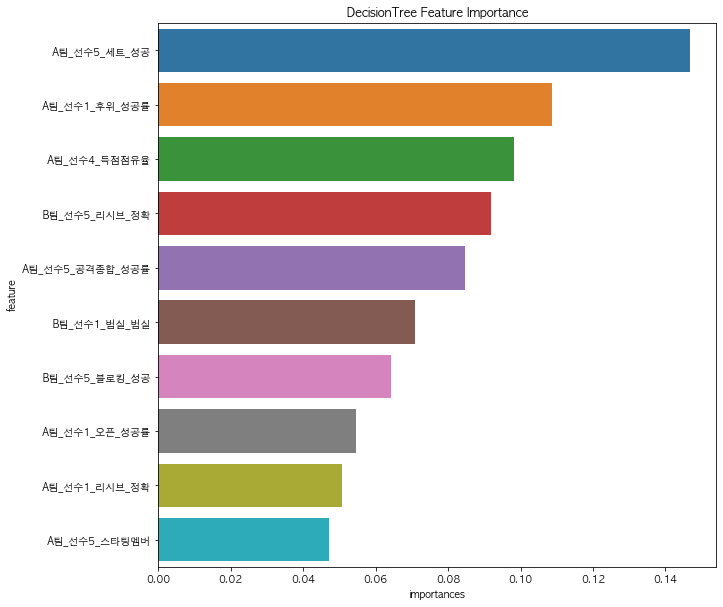

In [38]:
# 한글 깨짐 주의
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.barplot(y = 'feature', x = 'importances', data = feature_df.head(10))
plt.title("DecisionTree Feature Importance")
plt.show()

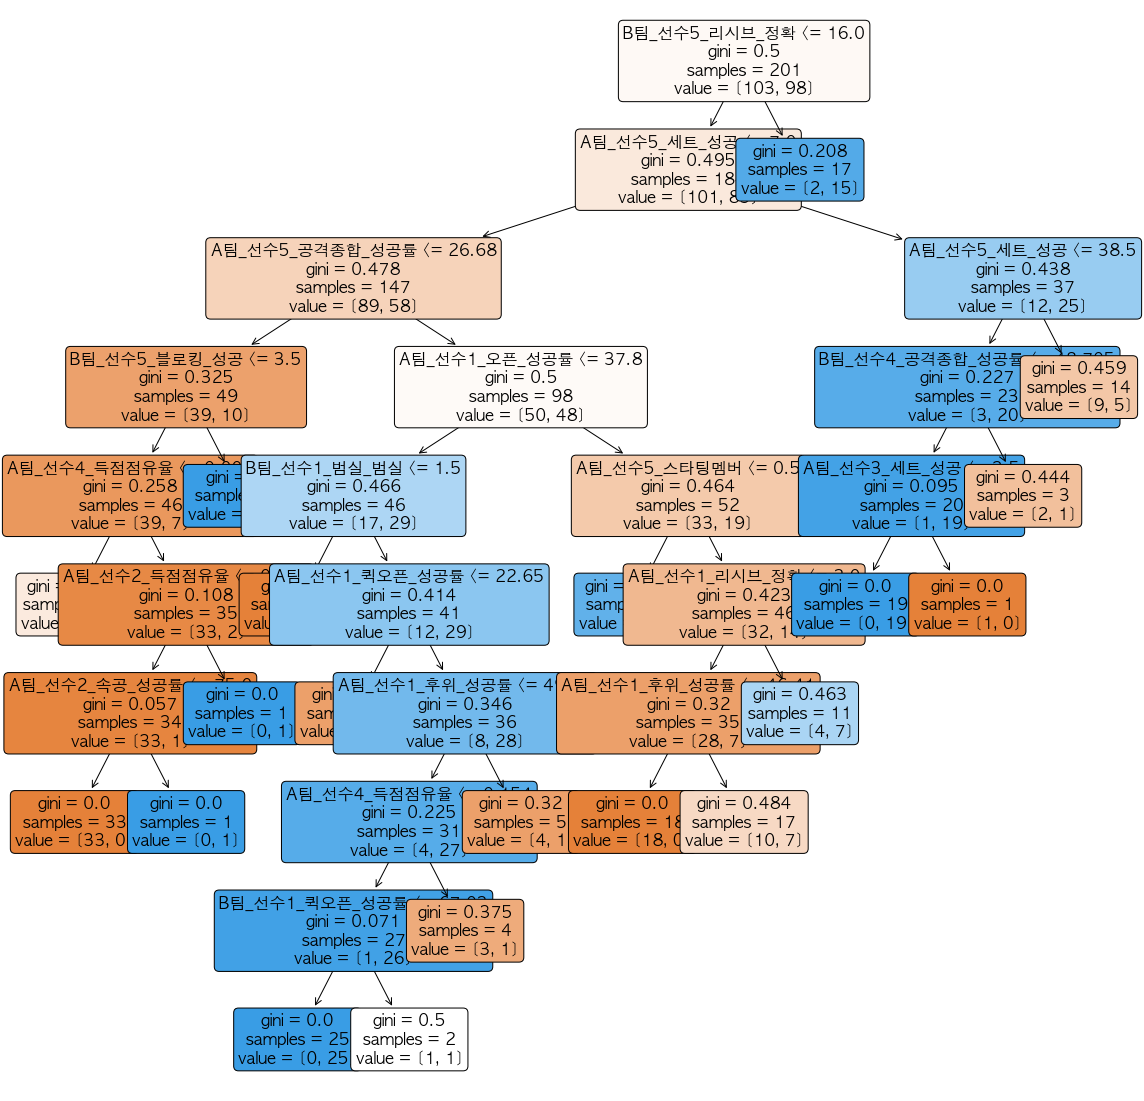

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20))
plot_tree(tree,
          max_depth = 10,
          feature_names = X.columns,
          fontsize = 16,
          filled = True,
          rounded = True)
plt.show()

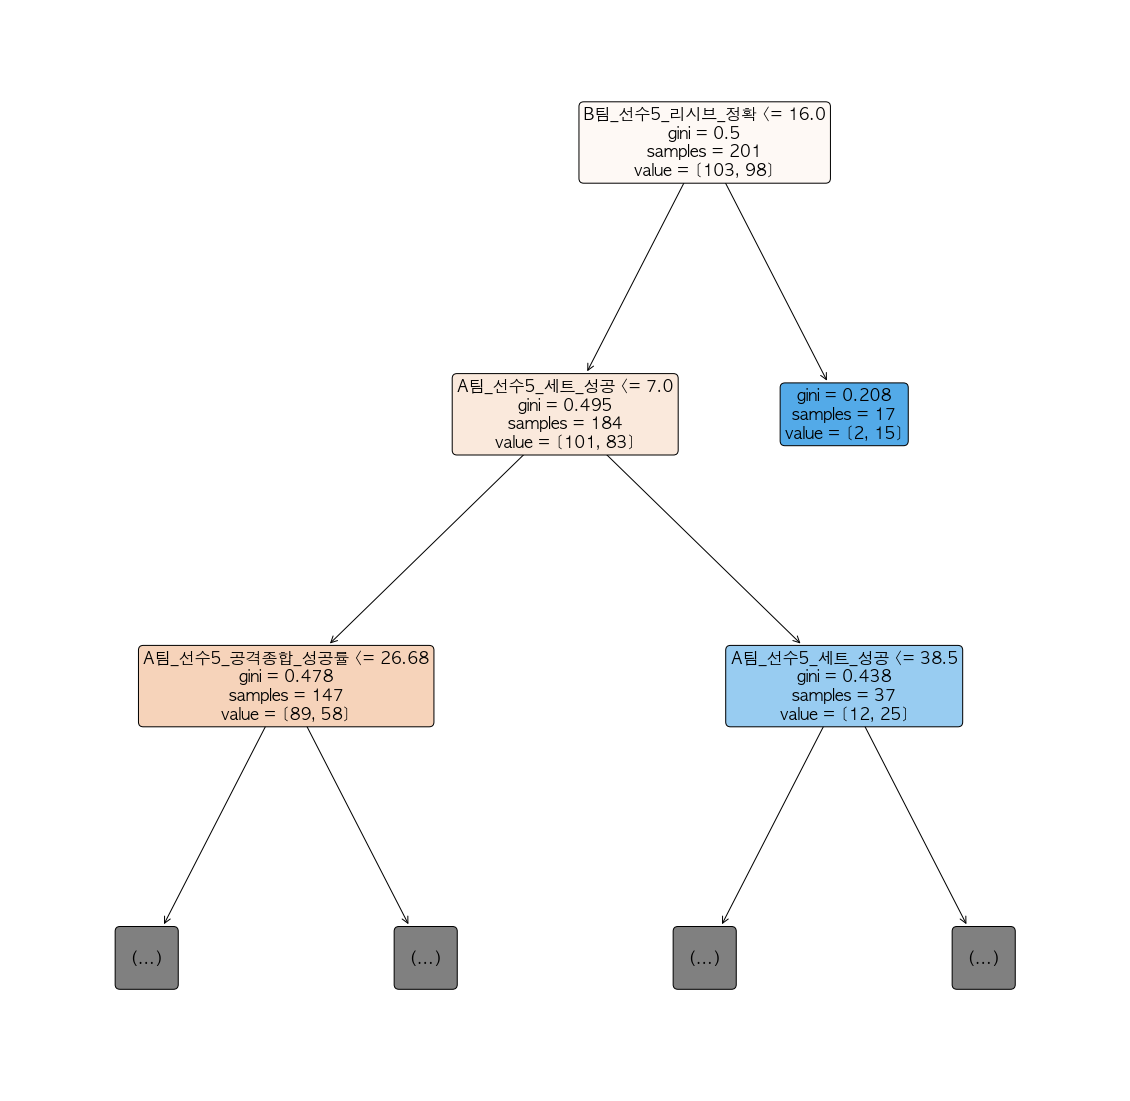

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20))
plot_tree(tree,
          max_depth = 2,
          feature_names = X.columns,
          fontsize = 16,
          filled = True,
          rounded = True)
plt.show()

### GradientBoost

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gbr = GradientBoostingClassifier(random_state=SEED)
gbr.fit(X_train, y_train)
gbr.score(X_train, y_train), gbr.score(X_test, y_test)

(1.0, 0.5074626865671642)

처음 accuracy  
(1.0, 0.41379310344827586)  
너무 심한 과적합  
(1.0, 0.5862068965517241)

In [43]:
gbr = GradientBoostingClassifier(random_state=SEED, learning_rate=0.05, n_estimators=500,subsample=0.9)
gbr.fit(X_train, y_train)
gbr.score(X_train, y_train), gbr.score(X_test, y_test)

(1.0, 0.5522388059701493)

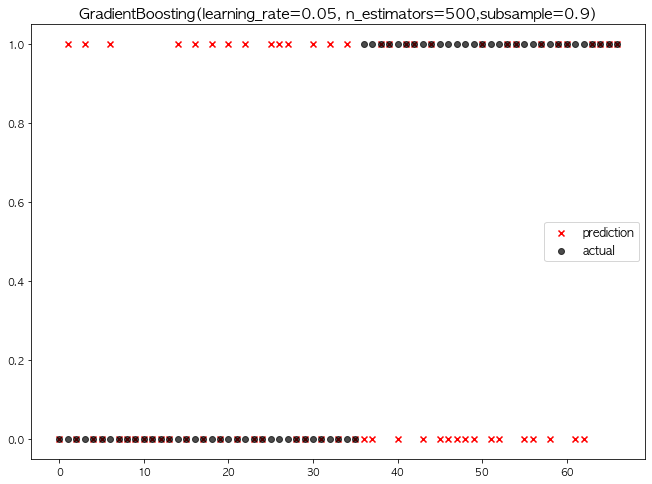

                                               model       mse
0                                   Ridge(alpha=0.1)  0.447761
1                                   Ridge(alpha=1.5)  0.447761
2  GradientBoosting(learning_rate=0.05, n_estimat...  0.447761


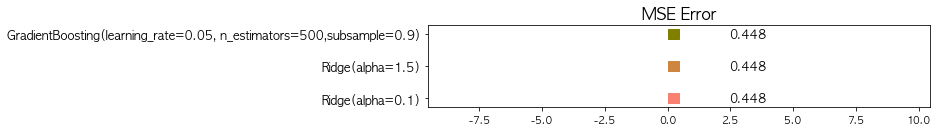

In [123]:
gbr = GradientBoostingClassifier(random_state=SEED, learning_rate=0.05, n_estimators=500,subsample=0.9)
gbr.fit(X_train, y_train)
gbr.score(X_train, y_train), gbr.score(X_test, y_test)
pred = gbr.predict(X_test)
mse_eval('GradientBoosting(learning_rate=0.05, n_estimators=500,subsample=0.9)', pred, y_test)

In [119]:
gbr = GradientBoostingClassifier(random_state=SEED, learning_rate=0.005, n_estimators=300,subsample=0.6, max_features='sqrt', max_depth=5)
gbr.fit(X_train, y_train)
gbr.score(X_train, y_train), gbr.score(X_test, y_test)

(1.0, 0.5373134328358209)

In [45]:
gbr_feature_df = pd.DataFrame(list(zip(gbr.feature_names_in_, gbr.feature_importances_)),
                         columns=['feature', 'importances']).sort_values(by = ['importances'],ascending = False)
gbr_feature_df.head(10)

,feature,importances
115,B팀_선수5_리시브_정확,0.045881
54,A팀_선수5_세트_성공,0.039784
109,B팀_선수5_오픈_성공률,0.035613
36,A팀_선수4_공격종합_성공률,0.032493
84,B팀_선수3_공격종합_성공률,0.032154
48,A팀_선수5_공격종합_성공률,0.030706
65,B팀_선수1_서브_성공률,0.029790
34,A팀_선수3_득점점유율,0.025698
74,B팀_선수2_후위_성공률,0.024905
0,A팀_선수1_공격종합_성공률,0.024188


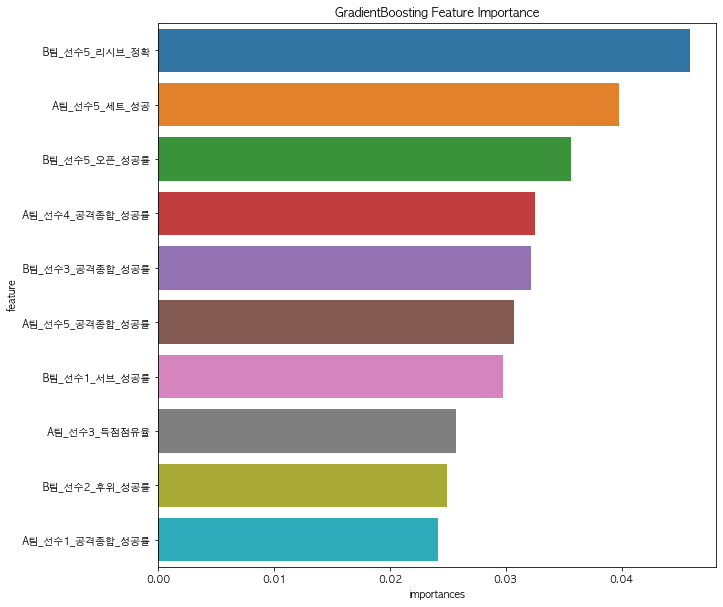

In [46]:
# 한글 깨짐 주의
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.barplot(y = 'feature', x = 'importances', data = gbr_feature_df.head(10))
plt.title("GradientBoosting Feature Importance")
plt.show()

### 변수별 관계 그래프 --> 리시브, 블로킹, 디그 관련 (선수1)

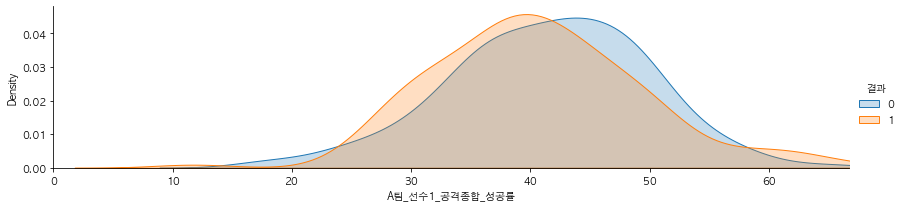

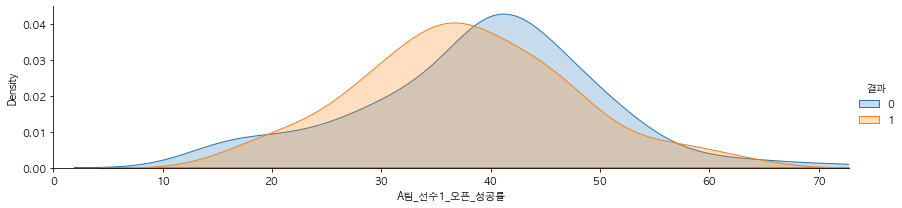

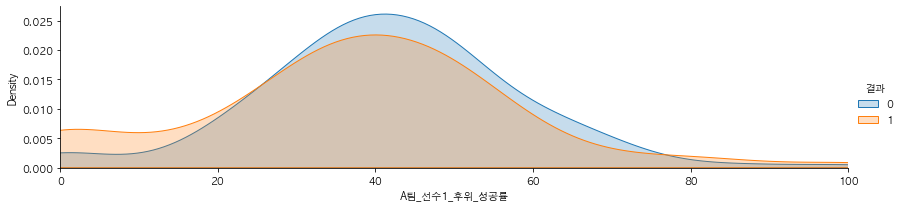

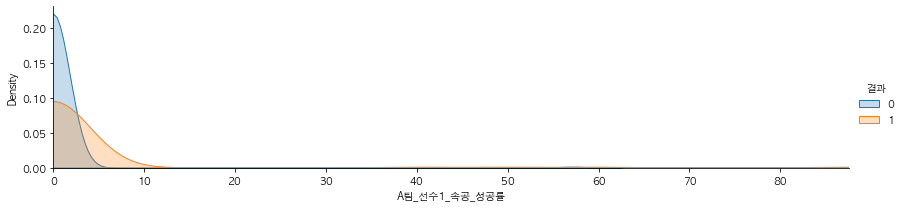

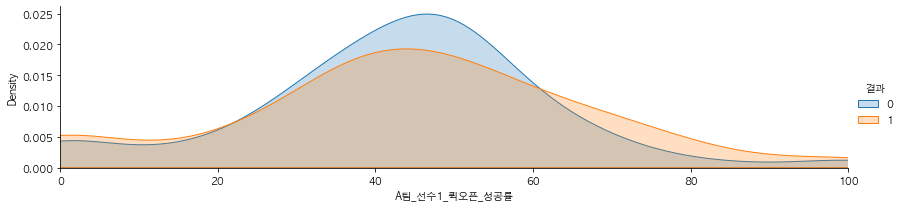

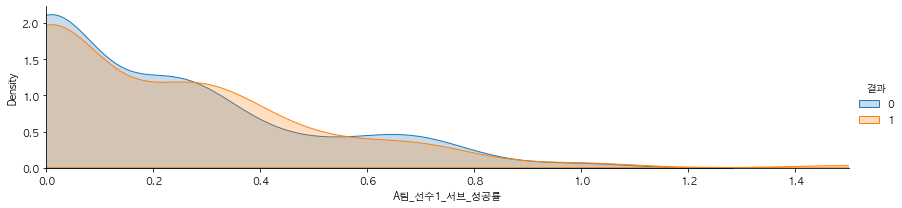

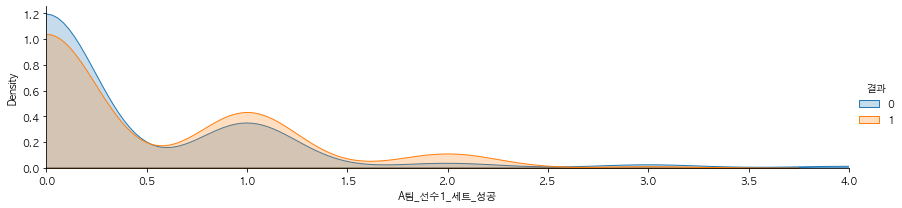

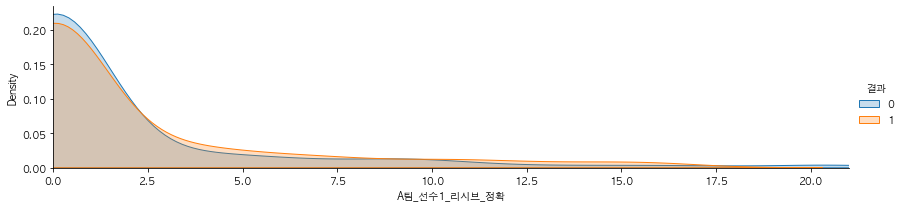

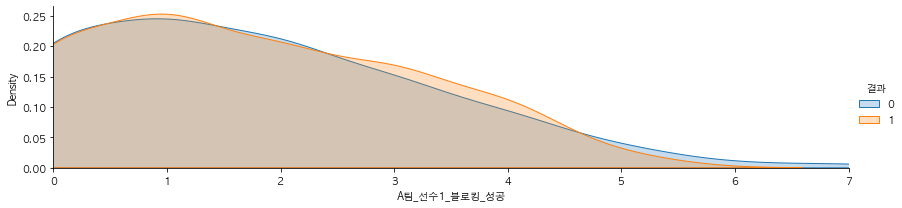

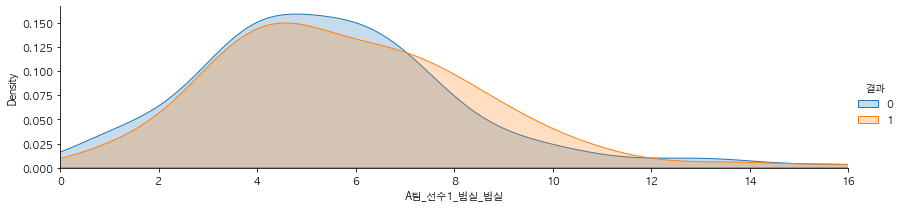

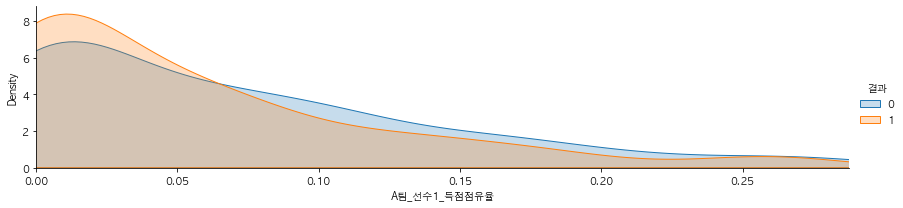

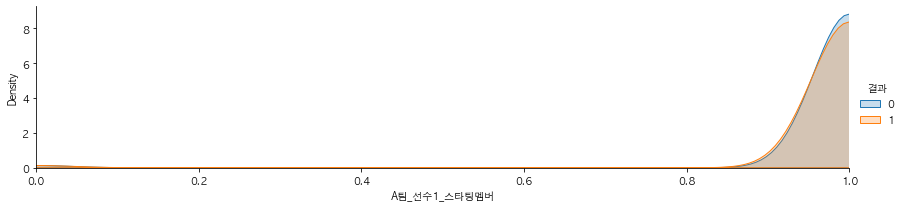

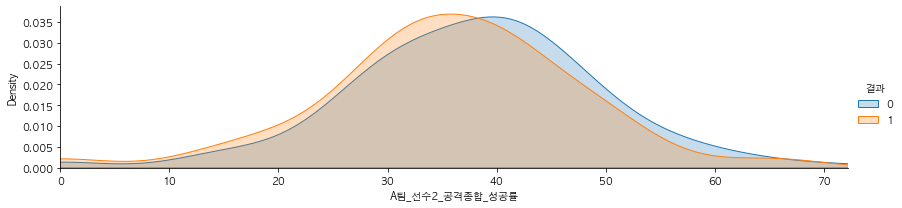

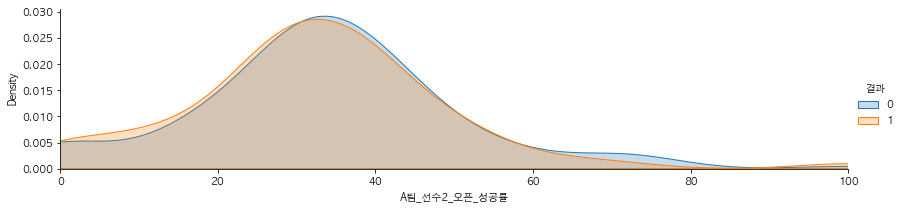

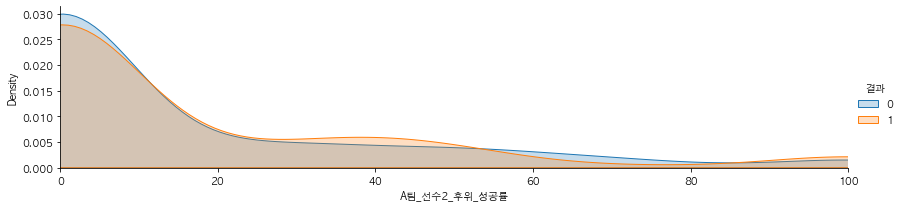

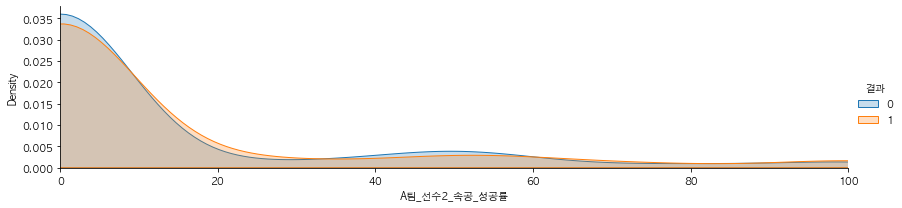

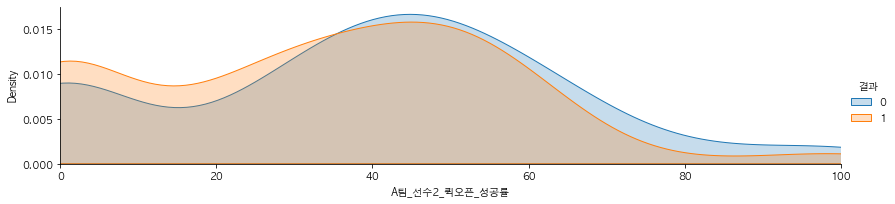

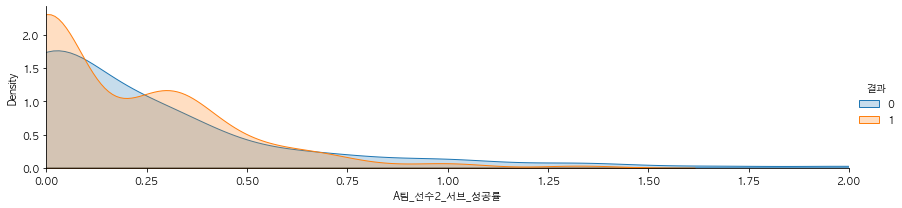

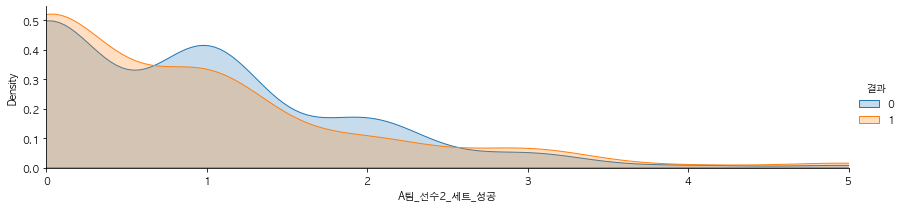

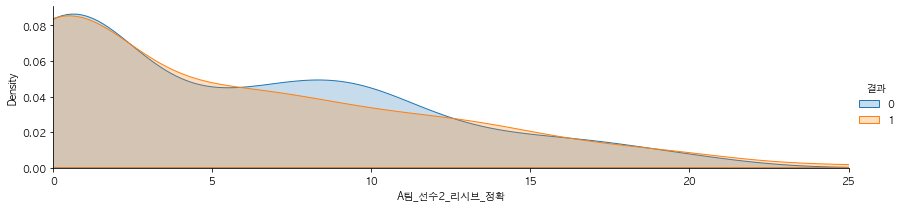

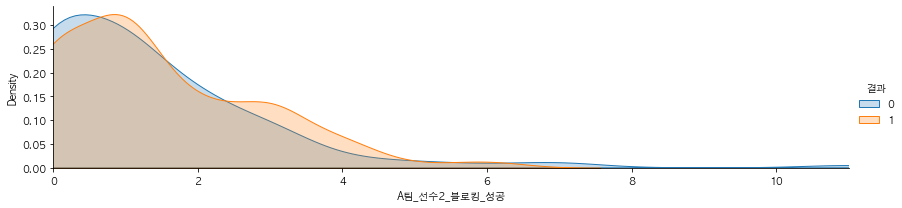

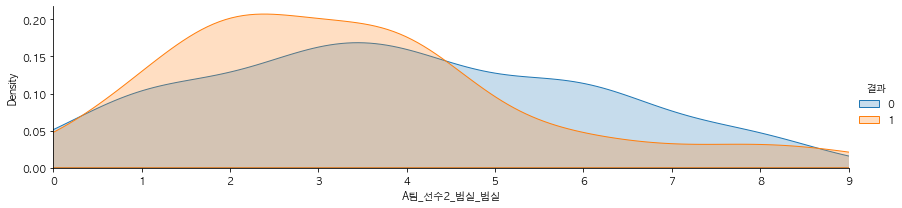

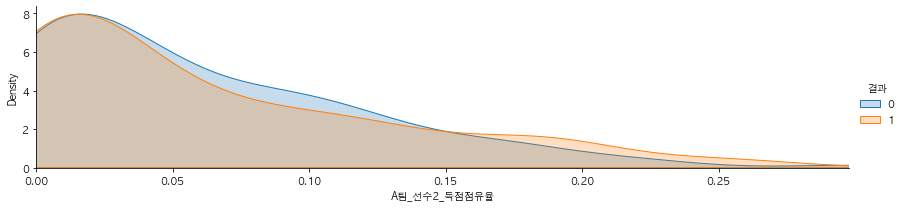

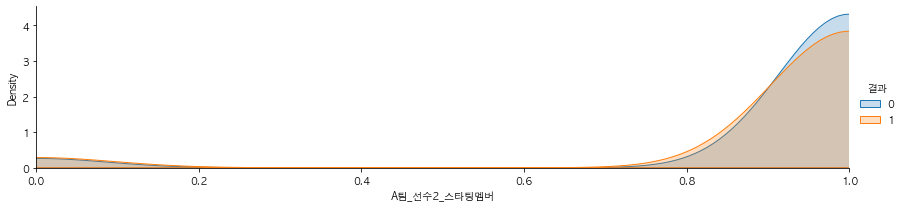

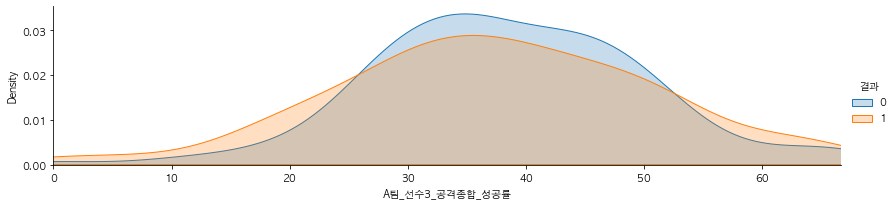

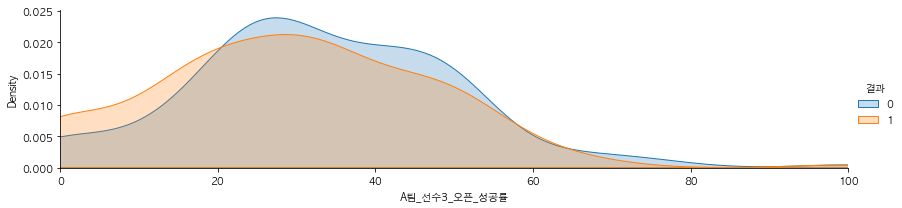

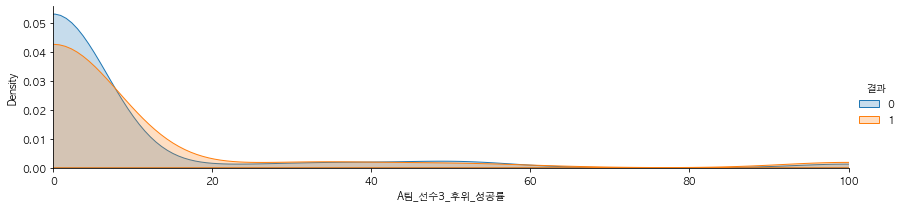

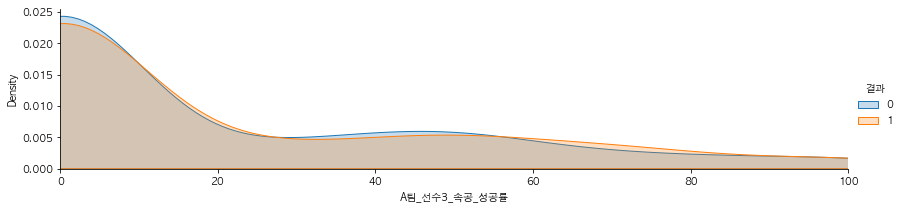

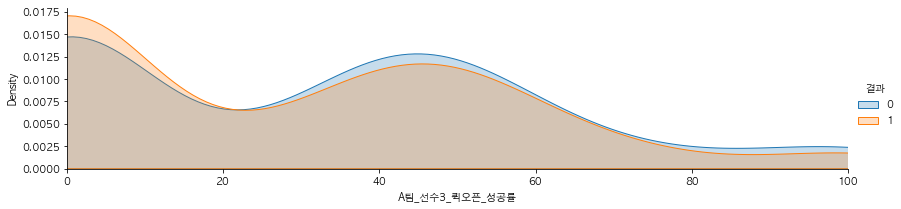

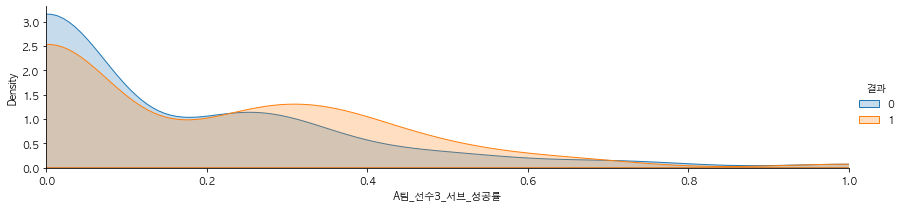

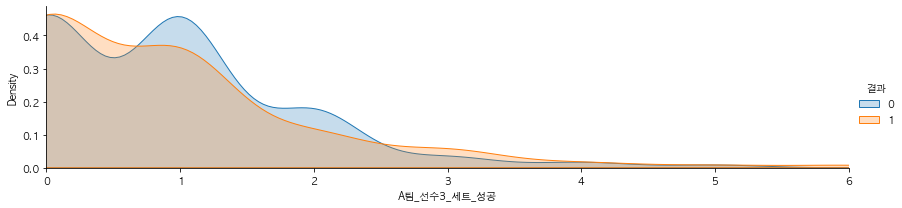

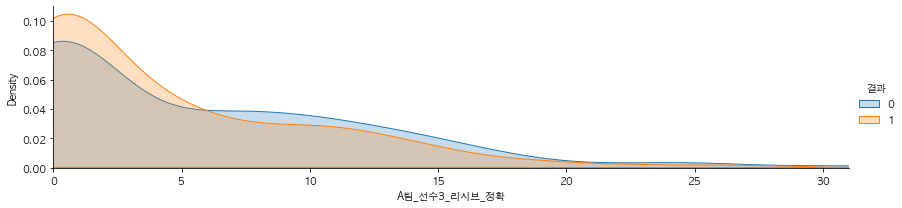

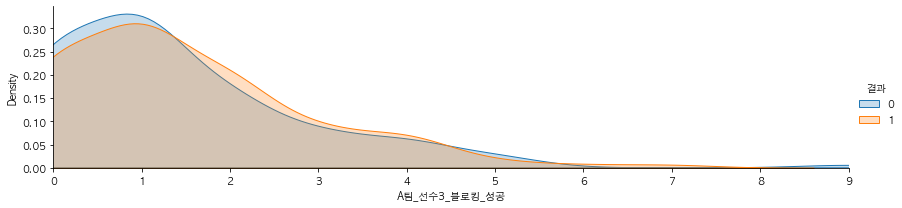

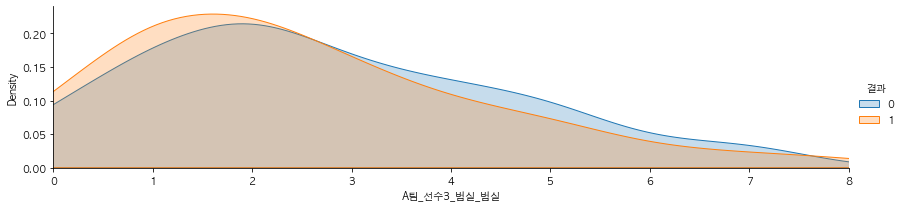

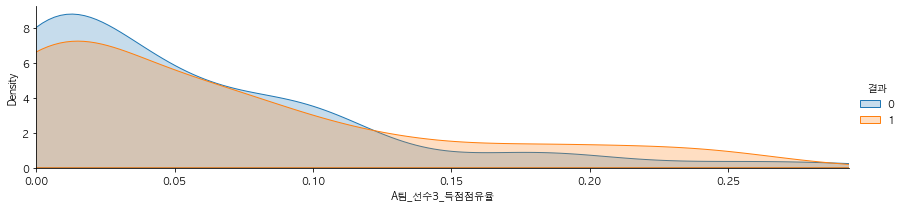

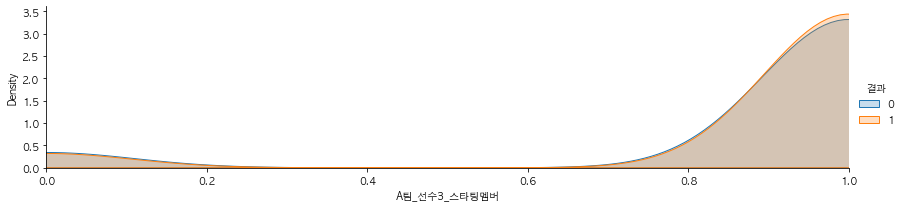

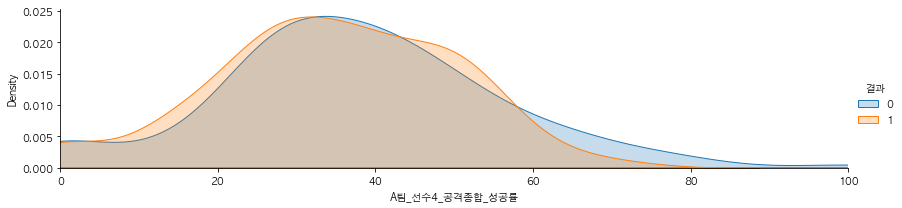

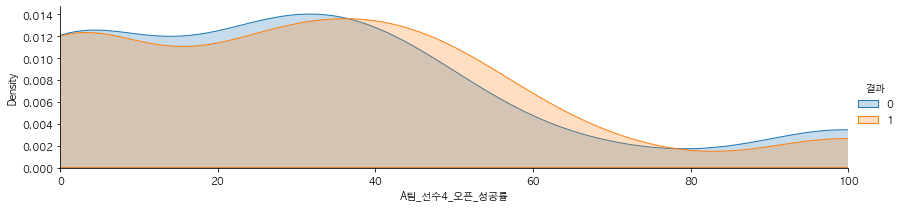

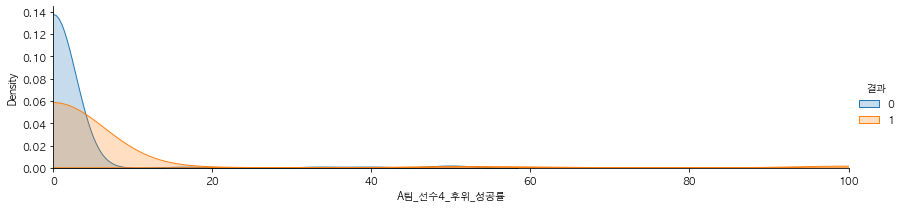

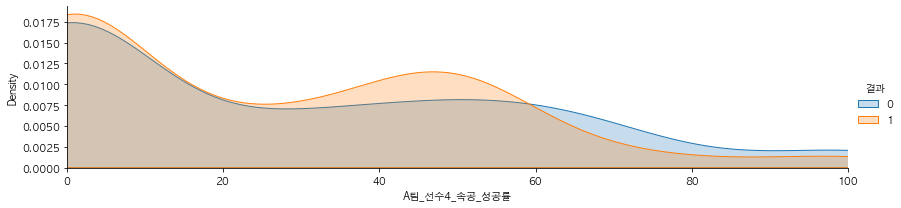

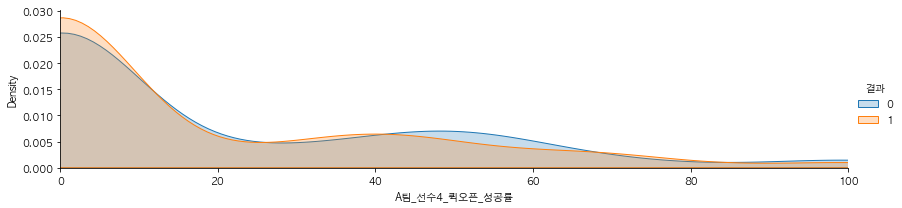

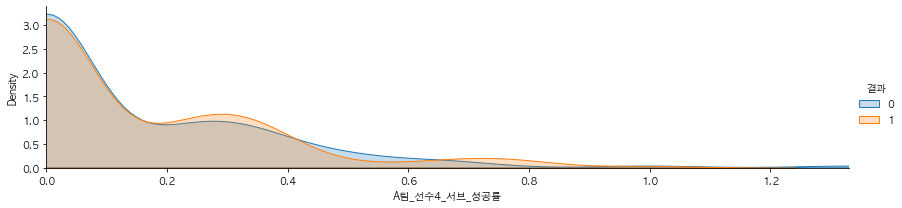

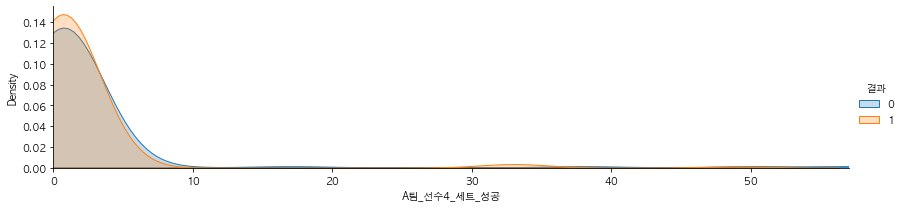

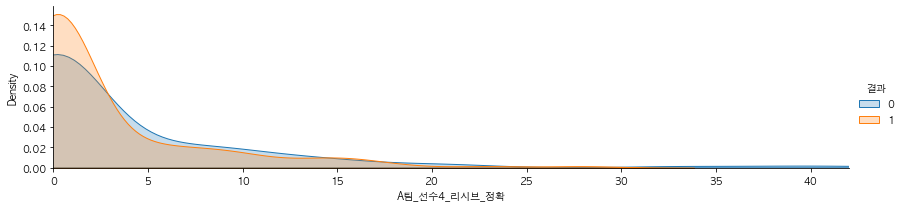

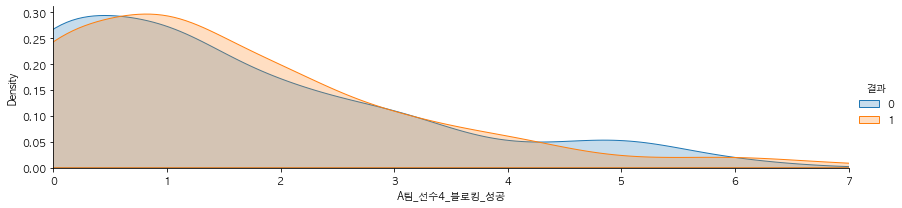

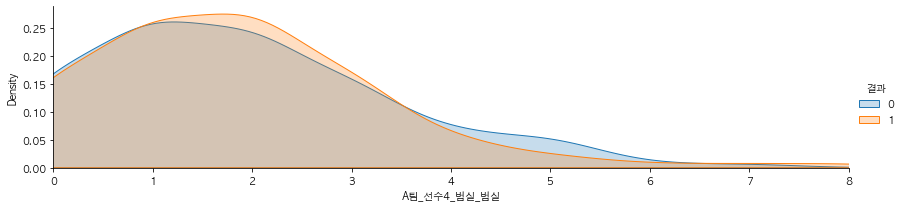

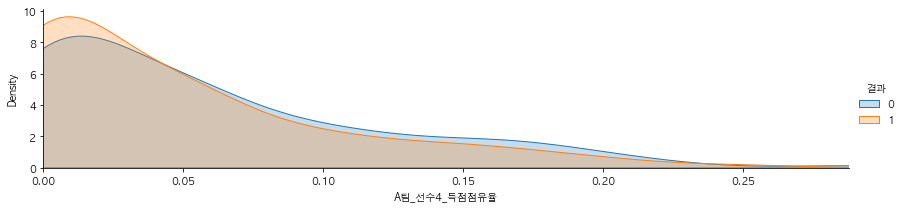

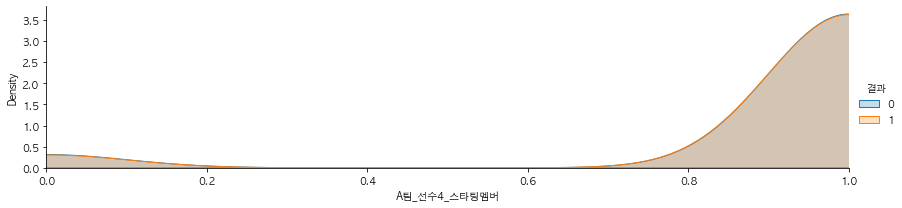

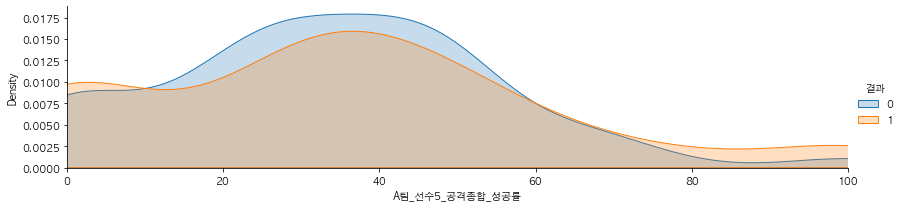

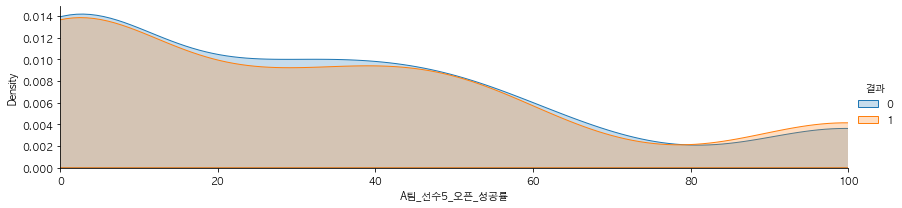

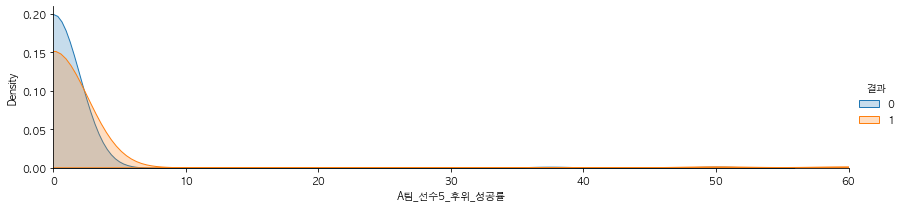

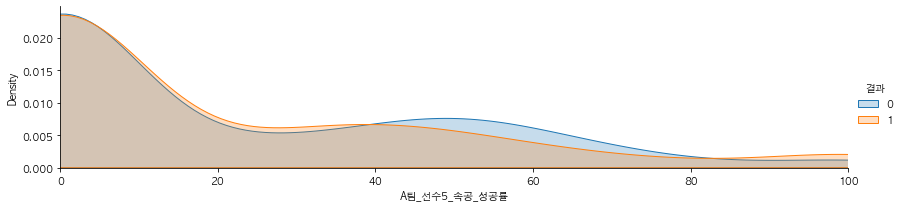

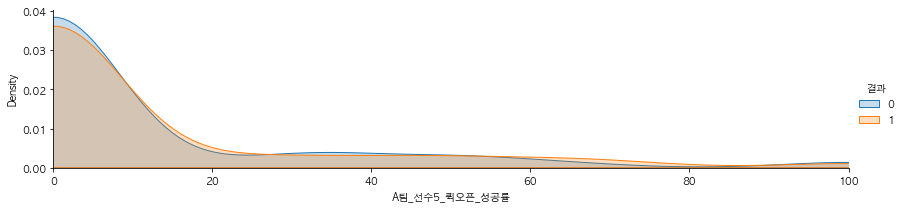

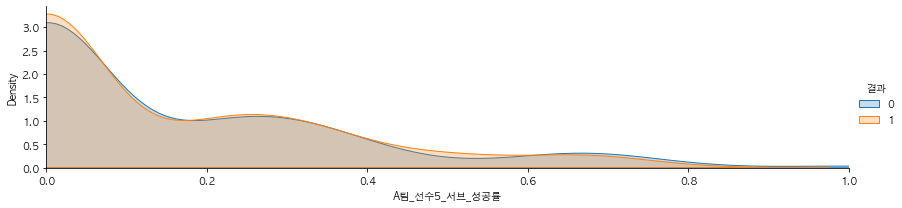

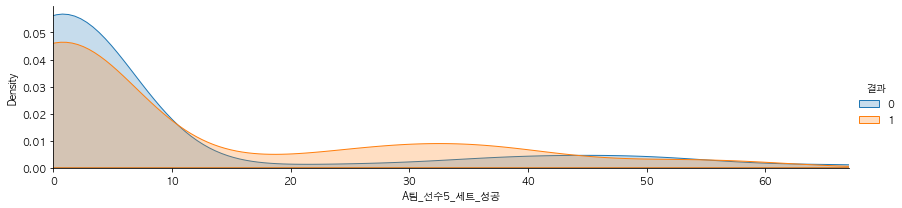

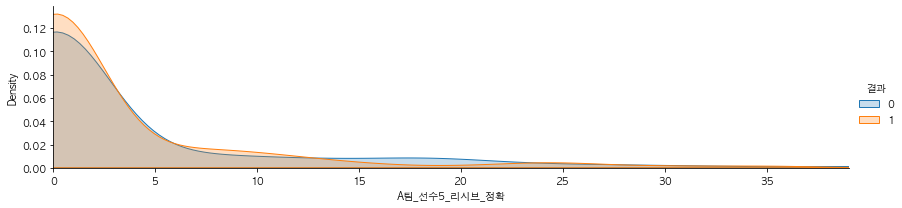

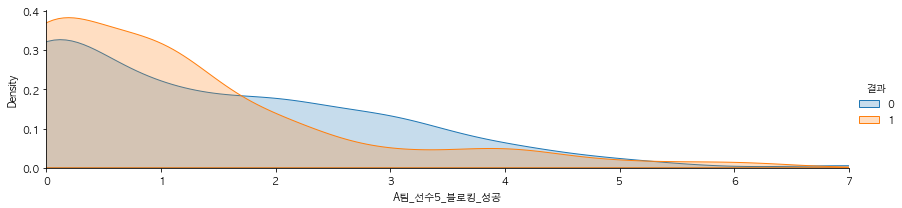

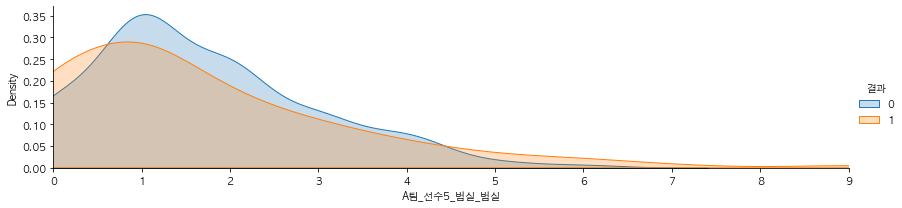

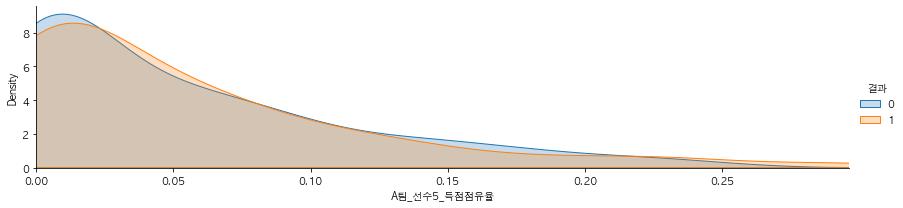

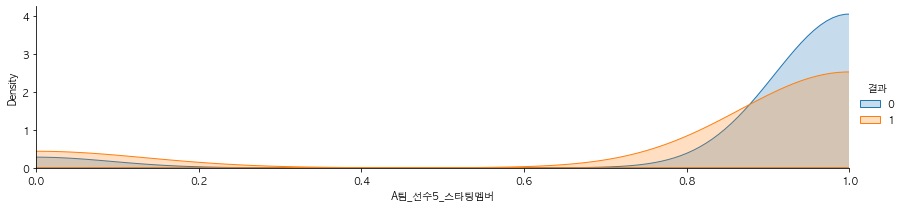

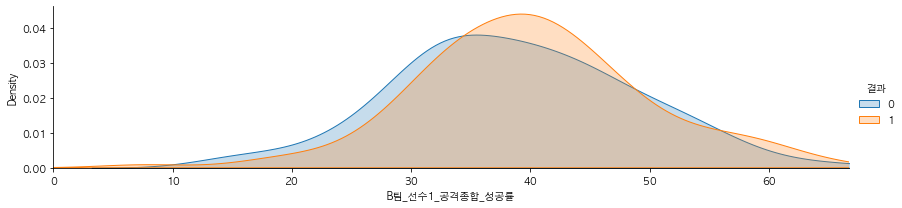

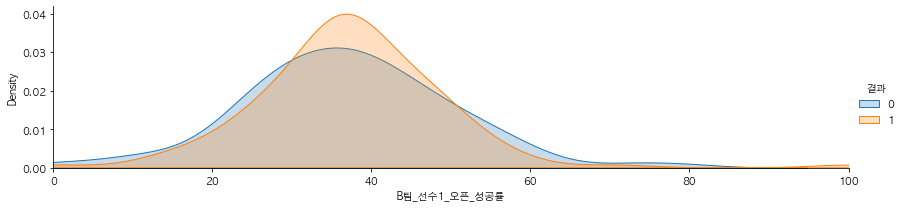

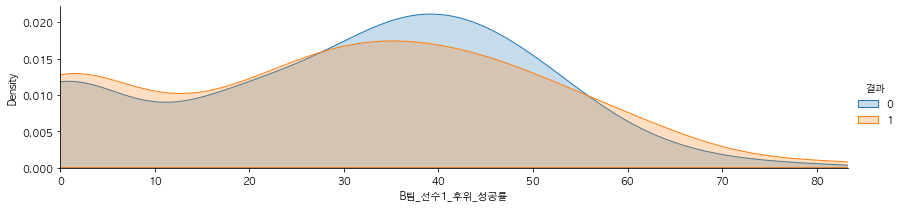

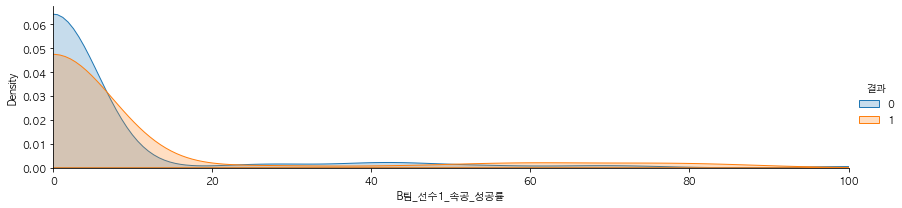

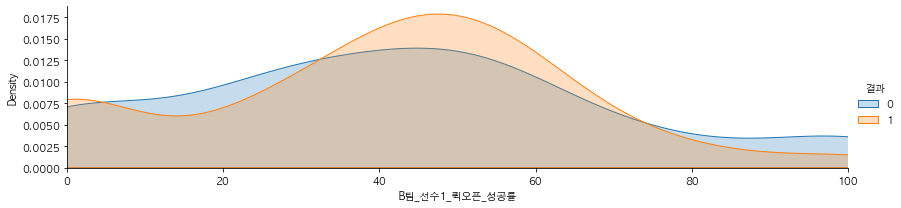

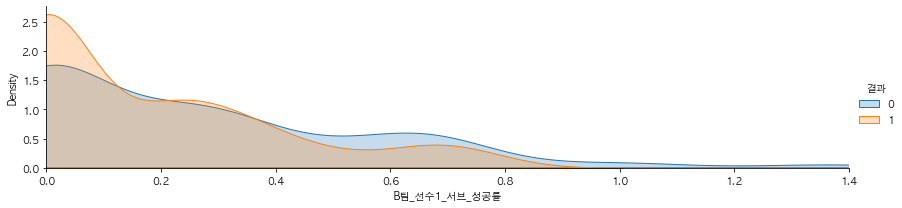

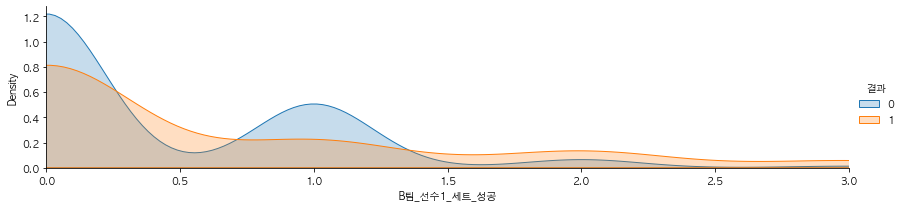

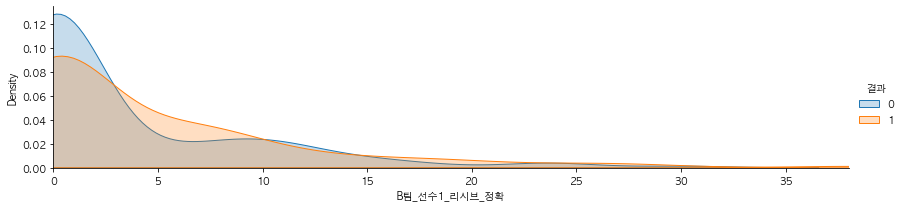

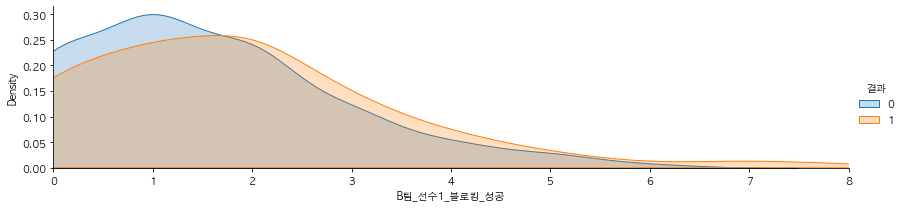

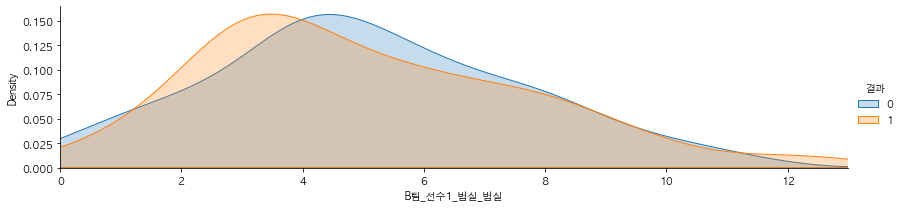

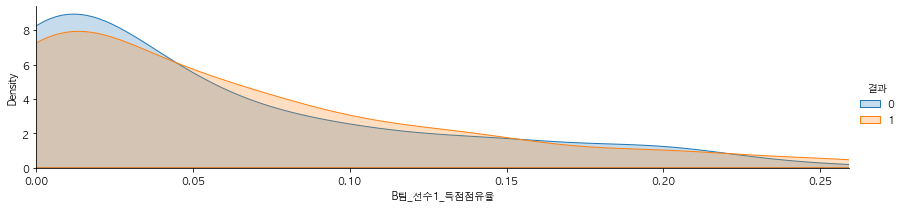

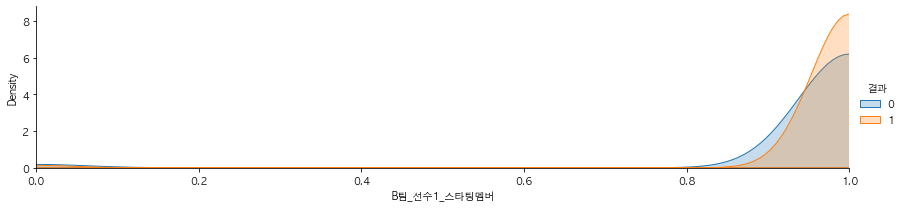

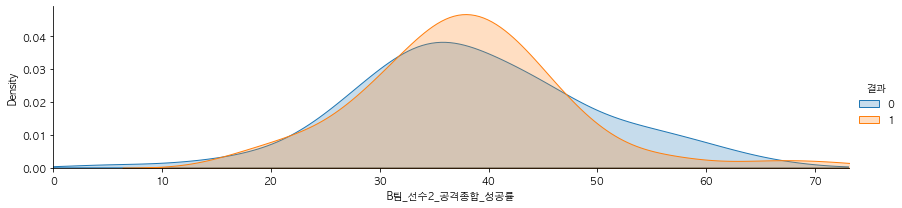

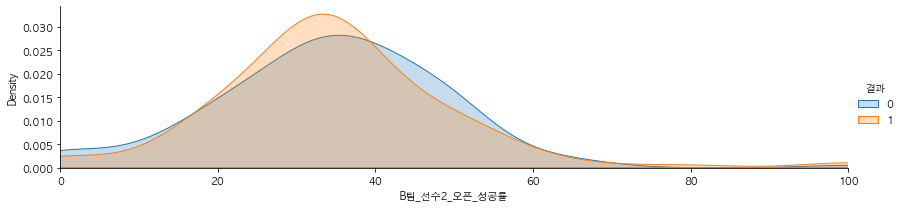

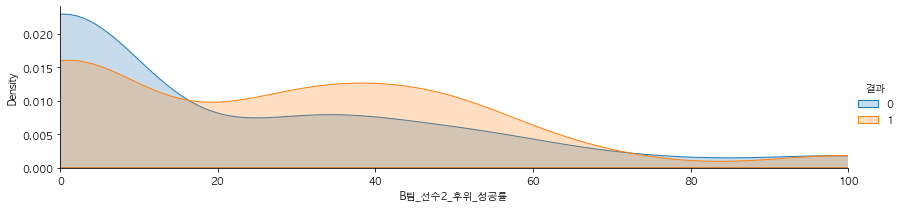

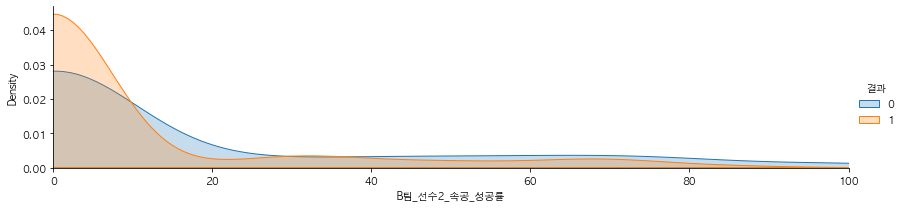

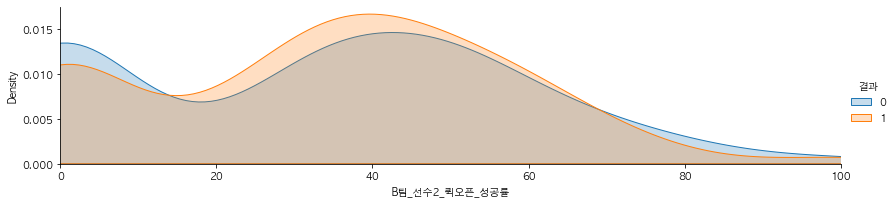

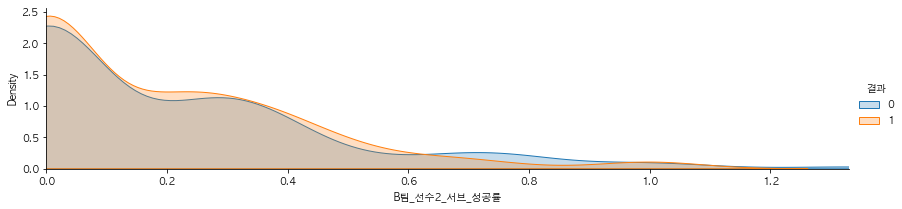

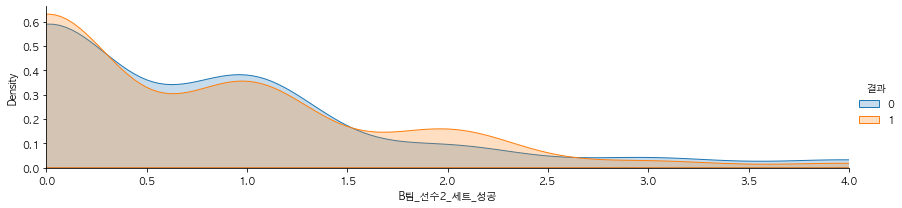

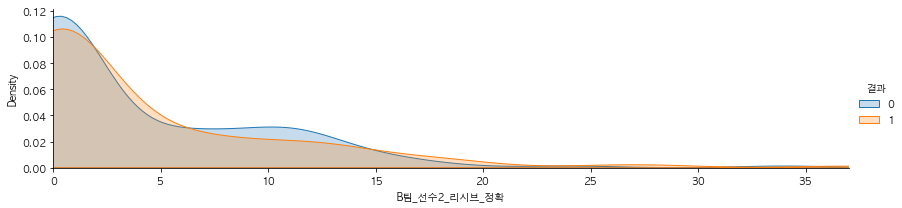

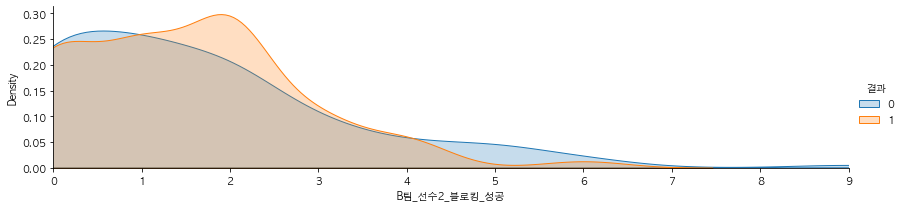

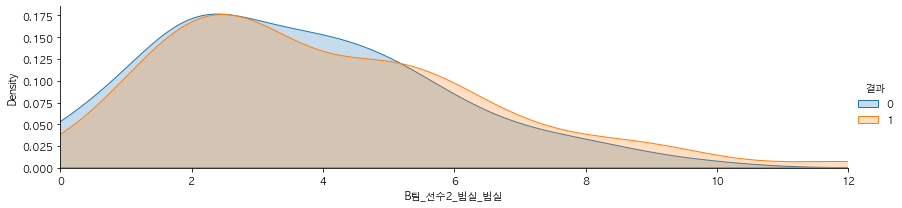

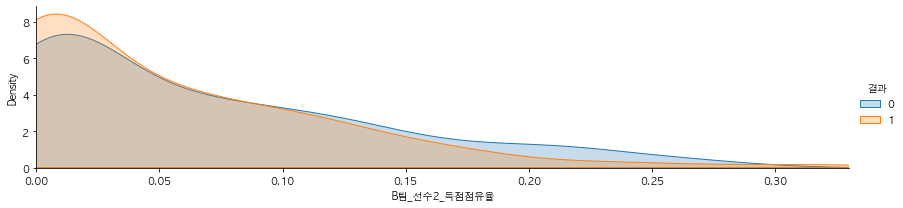

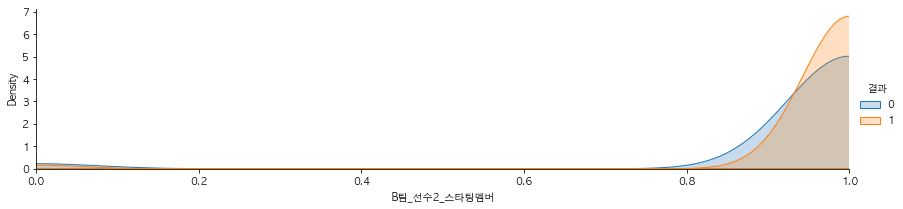

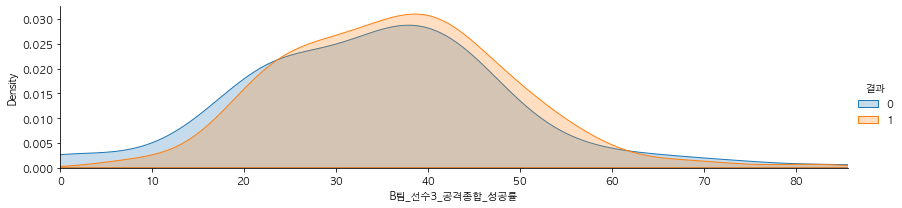

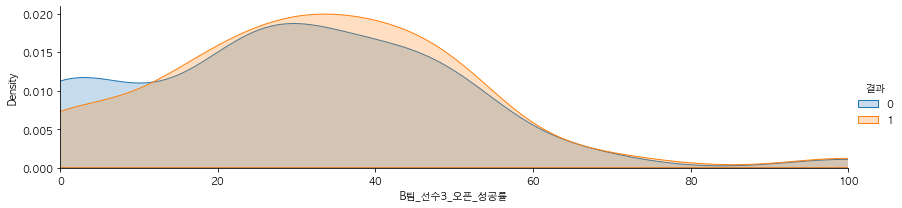

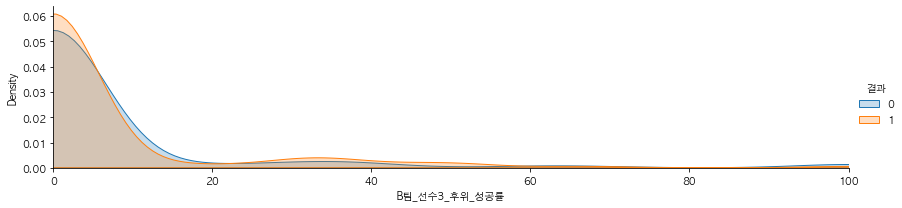

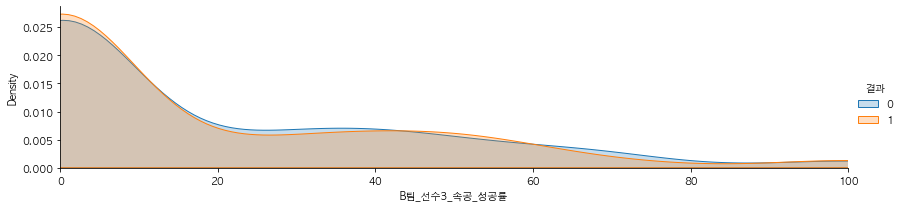

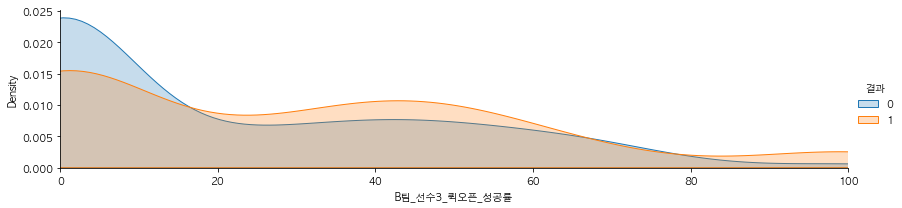

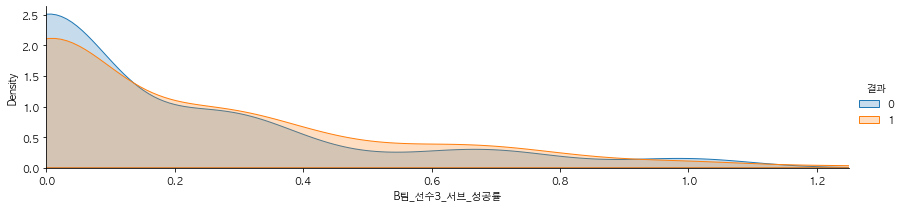

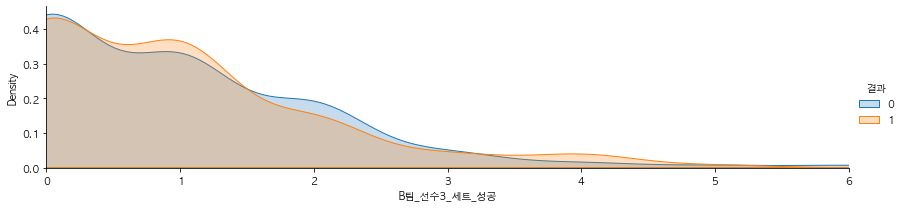

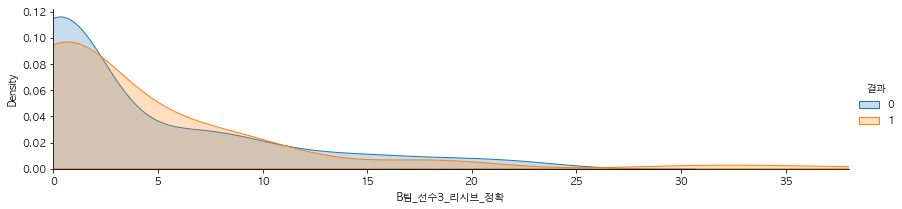

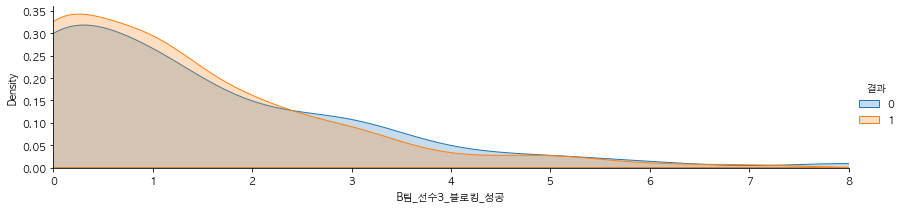

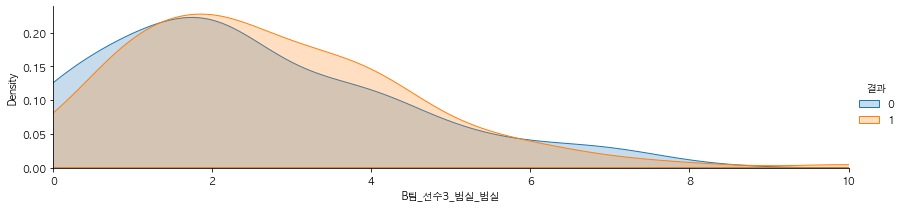

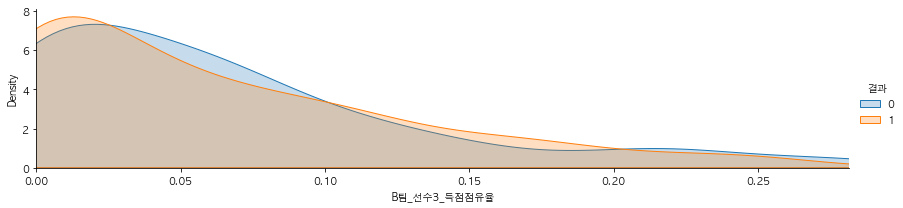

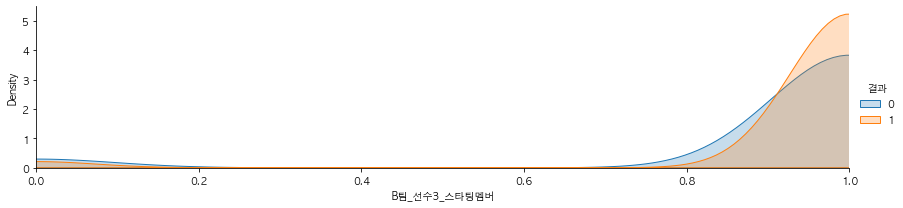

In [47]:
for i in range(1,97):
    facet = sns.FacetGrid(data, hue="결과",aspect=4)
    facet.map(sns.kdeplot,data.columns[i],shade= True)
    facet.set(xlim=(0, data[data.columns[i]].max()))
    facet.add_legend()
    plt.show()

### 상위 10개 column 으로 재학습

In [99]:
new_c = gbr_feature_df.head(10)
new_c  = list(new_c['feature'])

new_X = X[new_c]

scaler = StandardScaler()
new_X_scaled = scaler.fit_transform(new_X)


X1_train, X1_test, y1_train, y1_test = train_test_split(new_X_scaled, y, random_state= SEED, shuffle=False)


gbr = GradientBoostingClassifier(random_state=SEED, learning_rate=0.05, n_estimators=270,subsample=0.9)
gbr.fit(X1_train, y1_train)
gbr.score(X1_train, y1_train), gbr.score(X1_test, y1_test)
# from xgboost import XGBClassifier

# xgbm = XGBClassifier(random_state = SEED,
#                      n_estimators = 100,
#                      n_jobs = -1,
#                      max_depth = 3,
#                      learning_rate = 0.15)
# xgbm.fit(X_train, y_train)
# xgbm.score(X_train,y_train) , xgbm.score(X_test,y_test)

(1.0, 0.4925373134328358)

1.0, 0.6551724137931034  

(1.0, 0.6206896551724138) 떨어짐

### RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(random_state=SEED)
rf.fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.5074626865671642)

처음 accuracy  

(1.0, 0.47126436781609193)  
(1.0, 0.5862068965517241)

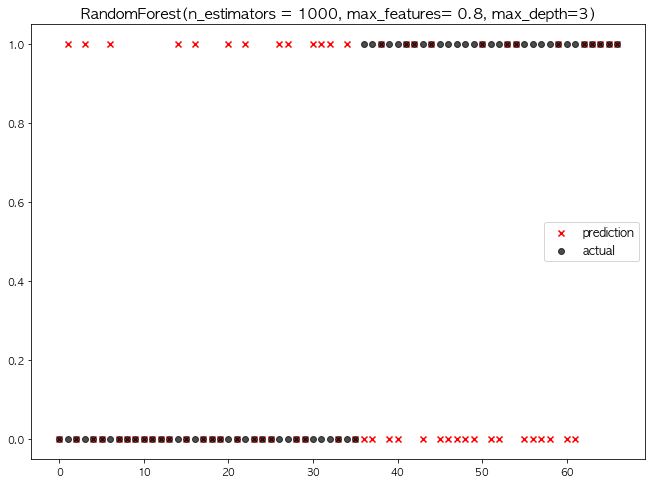

                                               model       mse
0  RandomForest(n_estimators = 1000, max_features...  0.462687
1                                   Ridge(alpha=0.1)  0.447761
2                                   Ridge(alpha=1.5)  0.447761
3  GradientBoosting(learning_rate=0.05, n_estimat...  0.447761


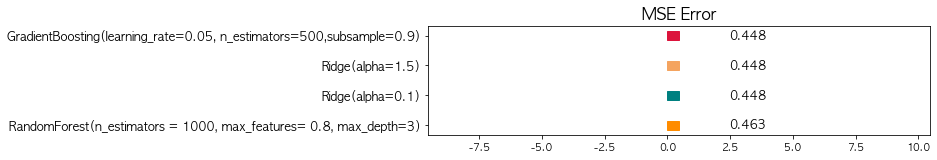

In [124]:
rf = RandomForestClassifier(random_state=SEED, n_estimators = 1000, max_features= 0.8, max_depth=3)
rf.fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)
pred = rf.predict(X_test)
mse_eval('RandomForest(n_estimators = 1000, max_features= 0.8, max_depth=3)', pred, y_test)

In [52]:
rf = RandomForestClassifier(random_state=SEED, n_estimators = 500, max_features= 0.8, max_depth=6)
rf.fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.5223880597014925)

In [54]:
rf_feature_df = pd.DataFrame(list(zip(rf.feature_names_in_, rf.feature_importances_)),
                         columns=['feature', 'importances']).sort_values(by = ['importances'],ascending = False)
rf_feature_df.head(10)

,feature,importances
115,B팀_선수5_리시브_정확,0.038315
109,B팀_선수5_오픈_성공률,0.027635
54,A팀_선수5_세트_성공,0.027044
2,A팀_선수1_후위_성공률,0.023737
48,A팀_선수5_공격종합_성공률,0.020271
60,B팀_선수1_공격종합_성공률,0.019783
36,A팀_선수4_공격종합_성공률,0.019559
12,A팀_선수2_공격종합_성공률,0.018948
84,B팀_선수3_공격종합_성공률,0.018470
4,A팀_선수1_퀵오픈_성공률,0.017721


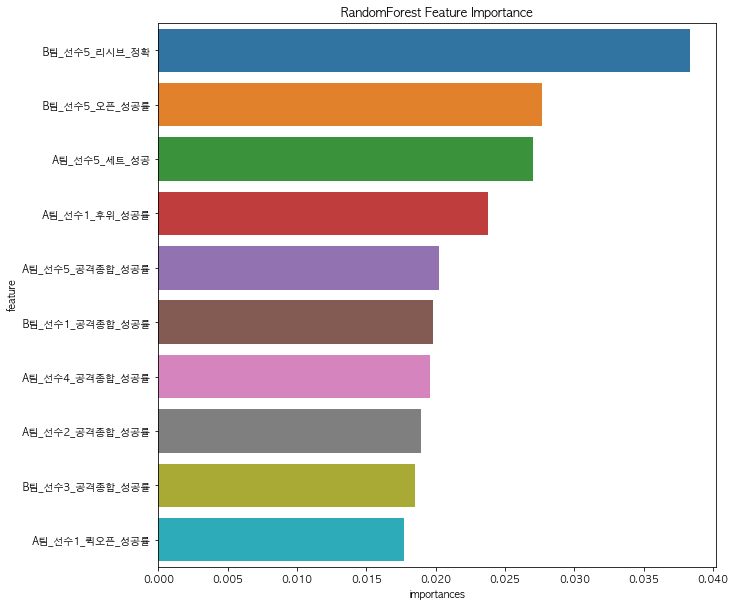

In [55]:
# 한글 깨짐 주의
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.barplot(y = 'feature', x = 'importances', data = rf_feature_df.head(10))
plt.title("RandomForest Feature Importance")
plt.show()

In [56]:
new_c = rf_feature_df.head(10)
new_c  = list(new_c['feature'])

new_X = X[new_c]

scaler = StandardScaler()
new_X_scaled = scaler.fit_transform(new_X)


X2_train, X2_test, y2_train, y2_test = train_test_split(new_X_scaled, y, random_state= SEED, shuffle=False)


rf = RandomForestClassifier(random_state=SEED, n_estimators = 10000, max_features= 0.8, max_depth=5)
rf.fit(X2_train, y2_train)
rf.score(X2_train, y2_train), rf.score(X2_test, y2_test)

(0.9601990049751243, 0.47761194029850745)

(0.9961538461538462, 0.6206896551724138)  
(0.95, 0.6091954022988506)

준석님 파라미터 확인
random_state = SEED, n_estimators = 1500, n_jobs = -1,
max_depth = 2, max_features = 0.1)


In [57]:
rf = RandomForestClassifier(random_state = SEED, n_estimators = 1500, n_jobs = -1, max_depth = 2, max_features = 0.1)
rf.fit(X2_train, y2_train)
rf.score(X2_train, y2_train), rf.score(X2_test, y2_test)

(0.7860696517412935, 0.47761194029850745)

## 앙상블

### 파이프라인 구축

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

`elasticnet 아닌거같다....!!!!!!`

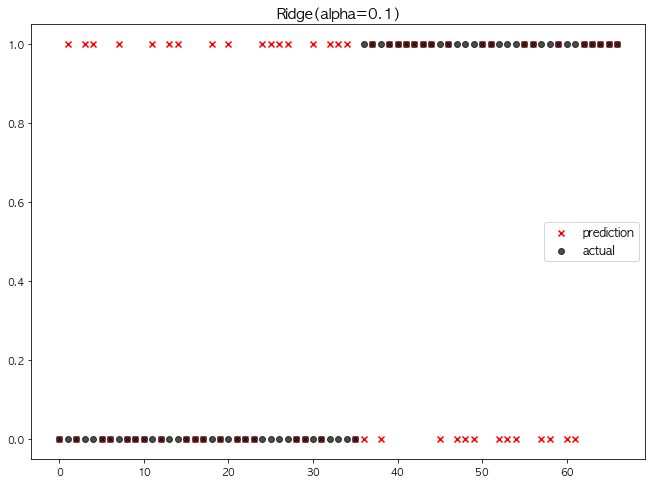

              model       mse
0  Ridge(alpha=0.1)  0.447761


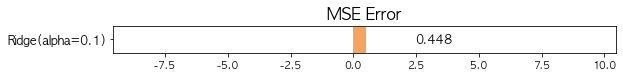

In [120]:
ridge = RidgeClassifier(alpha = 0.1,random_state=SEED)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)
pred = ridge.predict(X_test)
mse_eval('Ridge(alpha=0.1)', pred, y_test)

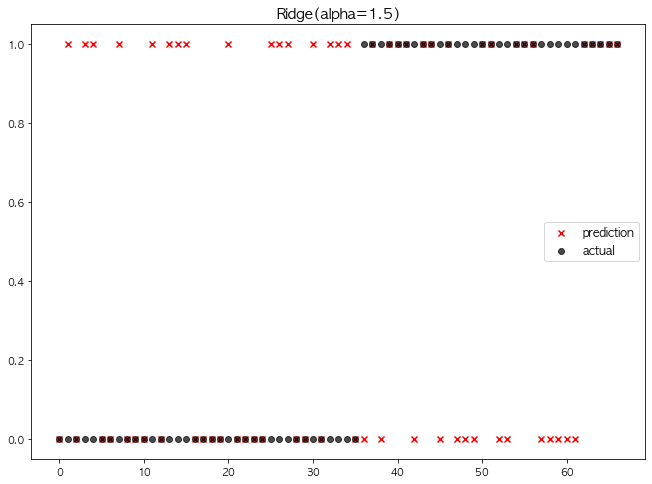

              model       mse
0  Ridge(alpha=0.1)  0.447761
1  Ridge(alpha=1.5)  0.447761


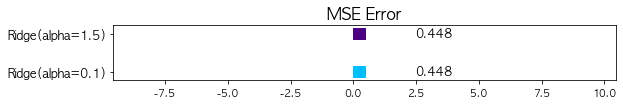

In [122]:
ridge = RidgeClassifier(alpha = 1.5,random_state=SEED)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)
pred = ridge.predict(X_test)
mse_eval('Ridge(alpha=1.5)', pred, y_test)

### voting

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [65]:
models = [
    ('grad', GradientBoostingClassifier()), 
    ('ridge', RidgeClassifier())
]

In [66]:
vc = VotingClassifier(models, voting='hard')
vc

VotingClassifier(estimators=[('grad', GradientBoostingClassifier()),
                             ('ridge', RidgeClassifier())])

In [67]:
vc.fit(X_train, y_train)
vc.score(X_train, y_train), vc.score(X_test, y_test)

(0.9502487562189055, 0.4925373134328358)